# 

## Import Libaries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor


In [2]:
sns.set_style('whitegrid')

In [3]:
train = pd.read_csv('../datasets/train.csv')

In [4]:
## expand view
pd.set_option('display.max_columns', 81)
pd.set_option('display.max_rows', 80)

In [5]:
train.head()

Id        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street Alley  \
0  109  533352170           60        RL           NaN     13517   Pave   NaN   
1  544  531379050           60        RL          43.0     11492   Pave   NaN   
2  153  535304180           20        RL          68.0      7922   Pave   NaN   
3  318  916386060           60        RL          73.0      9802   Pave   NaN   
4  255  906425045           50        RL          82.0     14235   Pave   NaN   

  Lot Shape Land Contour Utilities Lot Config Land Slope Neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  Condition 1 Condition 2 Bldg Type House Style  Overall Qual  Overall Cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   Year Built  Year Remod/Add Roof Style Roof Matl Exterior 1st Exterior 2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  Mas Vnr Type  Mas Vnr Area Exter Qual Exter Cond Foundation Bsmt Qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  Bsmt Cond Bsmt Exposure BsmtFin Type 1  BsmtFin SF 1 BsmtFin Type 2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF Heating Heating QC Central Air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  Electrical  1st Flr SF  2nd Flr SF  Low Qual Fin SF  Gr Liv Area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   Bsmt Full Bath  Bsmt Half Bath  Full Bath  Half Bath  Bedroom AbvGr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2  

## Process Data

In [6]:
train.describe()

Id           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2051.000000  2.051000e+03  2051.000000   1721.000000    2051.000000   
mean   1474.033642  7.135900e+08    57.008776     69.055200   10065.208191   
std     843.980841  1.886918e+08    42.824223     23.260653    6742.488909   
min       1.000000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     753.500000  5.284581e+08    20.000000     58.000000    7500.000000   
50%    1486.000000  5.354532e+08    50.000000     68.000000    9430.000000   
75%    2198.000000  9.071801e+08    70.000000     80.000000   11513.500000   
max    2930.000000  9.241520e+08   190.000000    313.000000  159000.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2051.000000   2051.000000  2051.000000     2051.000000   2029.000000   
mean       6.112140      5.562165  1971.708922     1984.190151     99.695909   
std        1.426271      1.104497    30.177889       21.036250    174.963129   
min        1.000000      1.000000  1872.000000     1950.000000      0.000000   
25%        5.000000      5.000000  1953.500000     1964.500000      0.000000   
50%        6.000000      5.000000  1974.000000     1993.000000      0.000000   
75%        7.000000      6.000000  2001.000000     2004.000000    161.000000   
max       10.000000      9.000000  2010.000000     2010.000000   1600.000000   

       BsmtFin SF 1  BsmtFin SF 2  Bsmt Unf SF  Total Bsmt SF   1st Flr SF  \
count   2050.000000   2050.000000  2050.000000    2050.000000  2051.000000   
mean     442.300488     47.959024   567.728293    1057.987805  1164.488055   
std      461.204124    165.000901   444.954786     449.410704   396.446923   
min        0.000000      0.000000     0.000000       0.000000   334.000000   
25%        0.000000      0.000000   220.000000     793.000000   879.500000   
50%      368.000000      0.000000   474.500000     994.500000  1093.000000   
75%      733.750000      0.000000   811.000000    1318.750000  1405.000000   
max     5644.000000   1474.000000  2336.000000    6110.000000  5095.000000   

        2nd Flr SF  Low Qual Fin SF  Gr Liv Area  Bsmt Full Bath  \
count  2051.000000      2051.000000  2051.000000     2049.000000   
mean    329.329108         5.512921  1499.330083        0.427526   
std     425.671046        51.068870   500.447829        0.522673   
min       0.000000         0.000000   334.000000        0.000000   
25%       0.000000         0.000000  1129.000000        0.000000   
50%       0.000000         0.000000  1444.000000        0.000000   
75%     692.500000         0.000000  1728.500000        1.000000   
max    1862.000000      1064.000000  5642.000000        3.000000   

       Bsmt Half Bath    Full Bath    Half Bath  Bedroom AbvGr  Kitchen AbvGr  \
count     2049.000000  2051.000000  2051.000000    2051.000000    2051.000000   
mean         0.063446     1.577279     0.371039       2.843491       1.042906   
std          0.251705     0.549279     0.501043       0.826618       0.209790   
min          0.000000     0.000000     0.000000       0.000000       0.000000   
25%          0.000000     1.000000     0.000000       2.000000       1.000000   
50%          0.000000     2.000000     0.000000       3.000000       1.000000   
75%          0.000000     2.000000     1.000000       3.000000       1.000000   
max          2.000000     4.000000     2.000000       8.000000       3.000000   

       TotRms AbvGrd   Fireplaces  Garage Yr Blt  Garage Cars  Garage Area  \
count    2051.000000  2051.000000    1937.000000  2050.000000  2050.000000   
mean        6.435885     0.590931    1978.707796     1.776585   473.671707   
std         1.560225     0.638516      25.441094     0.764537   215.934561   
min         2.000000     0.000000    1895.000000     0.000000     0.000000   
25%         5.000000     0.000000    1961.000000     1.000000   319.000000   
50%         6.000000     1.000000    1980.000000     2.000000   480.000000   


In [7]:
train.shape

(2051, 81)

In [8]:
train.dtypes

Id                int64
PID               int64
MS SubClass       int64
MS Zoning        object
Lot Frontage    float64
                 ...   
Misc Val          int64
Mo Sold           int64
Yr Sold           int64
Sale Type        object
SalePrice         int64
Length: 81, dtype: object

In [9]:
train.rename(columns= lambda x:x.replace(' ', '_').lower(), inplace = True)

In [10]:
train.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [11]:
# function to check for nulls with values sorted from highest to lowest
def check_nulls(data):
    data_sum = data.isnull().sum().sort_values(ascending = False)
    data_mean = data.isnull().mean().sort_values(ascending = False)
    print(data_sum)
    print()
    print(data_mean)

In [12]:
check_nulls(train)

pool_qc         2042
misc_feature    1986
alley           1911
fence           1651
fireplace_qu    1000
                ... 
heating_qc         0
central_air        0
electrical         0
1st_flr_sf         0
saleprice          0
Length: 81, dtype: int64

pool_qc         0.995612
misc_feature    0.968308
alley           0.931741
fence           0.804973
fireplace_qu    0.487567
                  ...   
heating_qc      0.000000
central_air     0.000000
electrical      0.000000
1st_flr_sf      0.000000
saleprice       0.000000
Length: 81, dtype: float64


In [13]:
# Drop columns with nulls close to and over 50%
cols_to_drop =['pool_qc', 'misc_feature', 'alley','fence','fireplace_qu']
train.drop(columns = cols_to_drop, inplace = True)

In [14]:
train.head(1)

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   

   kitchen_abvgr kitchen_qual  totrms_abvgrd functional  fireplaces  \
0              1           Gd              6        Typ           0   

  garage_type  garage_yr_blt garage_finish  garage_cars  garage_area  \
0      Attchd         1976.0           RFn          2.0        475.0   

  garage_qual garage_cond paved_drive  wood_deck_sf  open_porch_sf  \
0          TA          TA           Y             0             44   

   enclosed_porch  3ssn_porch  screen_porch  pool_area  misc_val  mo_sold  \
0               0           0             0          0         0        3   

   yr_sold sale_type  saleprice  
0     2010       WD      130500

In [15]:
train.shape

(2051, 76)

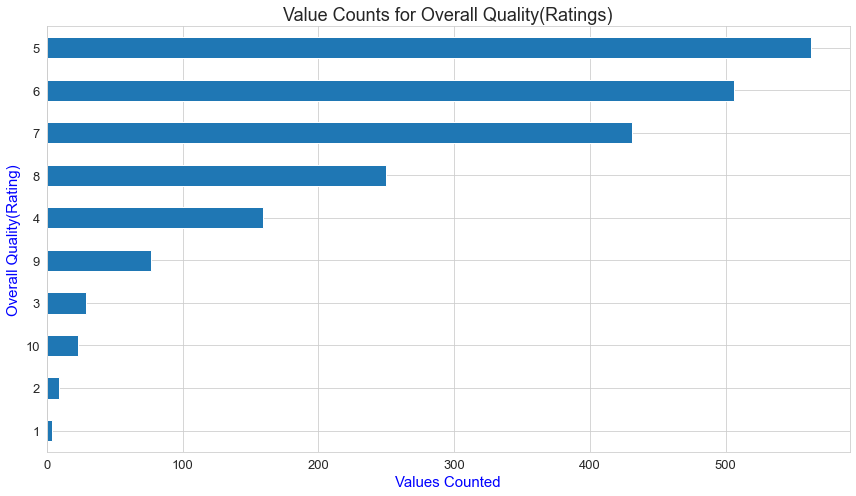

In [16]:
#Plot of value counts for Overall Quality column
plt.figure(figsize = (12,7))
plt.title('Value Counts for Overall Quality(Ratings)', fontsize = 18)
plt.yticks(fontsize = 13)
plt.ylabel('Overall Quality(Rating)',fontsize = 15, c = 'b')
plt.xticks(fontsize = 13)
plt.xlabel('Values Counted', fontsize = 15, c ='b')
train['overall_qual'].value_counts(ascending= True).plot(kind='barh');
plt.tight_layout()

The bigger frequencies reside between ratings of 5-7.

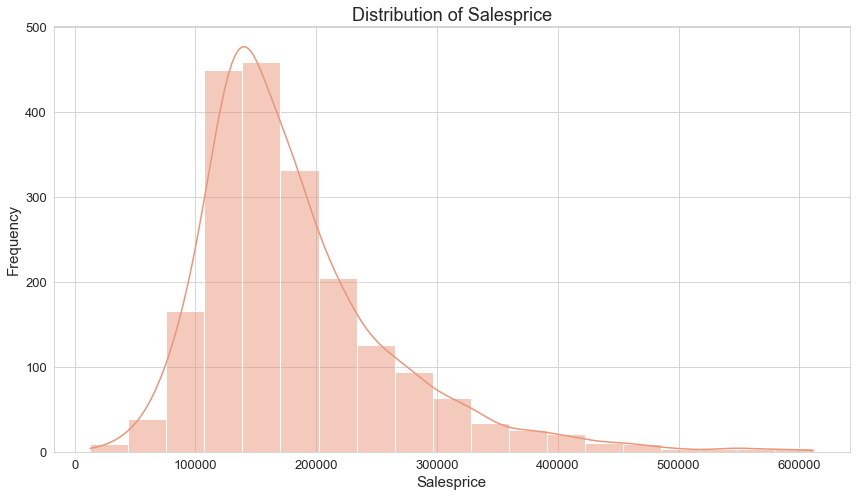

In [17]:
plt.figure(figsize = (12,7))
plt.title('Distribution of Salesprice',fontsize = 18)
plt.xlabel('Salesprice', fontsize = 15)
plt.xticks(fontsize = 13)
plt.ylabel('Frequency', fontsize = 15)
plt.yticks(fontsize = 13)
sns.histplot(data=train, x=train['saleprice'],kde=True, bins=19, color='darksalmon');
plt.tight_layout()


Looks like most values in the data set are between 120,000 to a little under 280,000. This is also a right-skewed distribution as the long tail extends to the right as most values are show on the left side(between 90,000 & 340,000). You can also see a value of 600,000 as an outlier as well.

In [18]:
# Look at aggregate metrics for saleprice to aid the visualization 
# & make decision about outlier
train[['saleprice']].describe()

saleprice
count    2051.000000
mean   181469.701609
std     79258.659352
min     12789.000000
25%    129825.000000
50%    162500.000000
75%    214000.000000
max    611657.000000

In [19]:
#25th & 75th percentiles
saleprice_25, saleprice_75 = 129825,214000
#calculate Interquartile range
saleprice_iqr = saleprice_75 -saleprice_25
#calculate outlier Cutoff
sp_cutoff = saleprice_iqr * 1.5
#upper & lower cut off points
upper_cutoff = saleprice_75 + sp_cutoff
lower_cutoff = saleprice_25 - sp_cutoff
print(upper_cutoff, lower_cutoff)

340262.5 3562.5


In [20]:
# filter based on cutoff
sales_price_outliers = train[train['saleprice']> 340262.5]
sales_price_outliers

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
22    2393  528142010           60        RL         103.0     12867   Pave   
41    2383  528110050           20        RL         107.0     13891   Pave   
68    1707  528150040           20        RL          94.0     13615   Pave   
81     367  527214050           20        RL          63.0     17423   Pave   
99    2450  528358030           60        RL          83.0     10019   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
1970  2443  528315030           60        RL          82.0      9452   Pave   
2002  1056  528110080           20        RL         107.0     13891   Pave   
2029   969  921128050           20        RL          85.0     12633   Pave   
2041  1065  528166120           60        RL         110.0     13688   Pave   
2045  1051  528102030           20        RL          96.0     12444   Pave   

     lot_shape land_contour utilities lot_config land_slope neighborhood  \
22         IR1          Lvl    AllPub     Corner        Gtl      NridgHt   
41         Reg          Lvl    AllPub     Inside        Gtl      NridgHt   
68         IR1          HLS    AllPub     Corner        Mod      NridgHt   
81         IR1          Lvl    AllPub    CulDSac        Gtl      StoneBr   
99         IR1          Lvl    AllPub     Inside        Gtl      NoRidge   
...        ...          ...       ...        ...        ...          ...   
1970       Reg          Lvl    AllPub     Inside        Gtl      NoRidge   
2002       Reg          Lvl    AllPub     Inside        Gtl      NridgHt   
2029       IR1          HLS    AllPub     Inside        Gtl       Timber   
2041       IR1          Lvl    AllPub     Inside        Gtl      NridgHt   
2045       Reg          Lvl    AllPub        FR2        Gtl      NridgHt   

     condition_1 condition_2 bldg_type house_style  overall_qual  \
22          Norm        Norm      1Fam      2Story             8   
41          Norm        Norm      1Fam      1Story            10   
68          Norm        Norm      1Fam      1Story             9   
81          Norm        Norm      1Fam      1Story             9   
99          Norm        Norm      1Fam      2Story             8   
...          ...         ...       ...         ...           ...   
1970        Norm        Norm      1Fam      2Story             8   
2002        Norm        Norm      1Fam      1Story             8   
2029        Norm        Norm      1Fam      1Story             9   
2041        Norm        Norm      1Fam      2Story             9   
2045        Norm        Norm      1Fam      1Story             8   

      overall_cond  year_built  year_remod/add roof_style roof_matl  \
22               5        2005            2006      Gable   CompShg   
41               5        2006            2006      Gable   CompShg   
68               5        2006            2006        Hip   CompShg   
81               5        2008            2009        Hip   CompShg   
99               5        1995            1995        Hip   CompShg   
...            ...         ...             ...        ...       ...   
1970             5        1997            1998      Gable   CompShg   
2002             5        2007            2008        Hip   CompShg   
2029             5        2007            2007        Hip   CompShg   
2041             5        2003            2004      Gable   CompShg   
2045             5        2008            2008        Hip   CompShg   

     exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area exter_qual  \
22        CemntBd      CmentBd          NaN           NaN         Gd   
41        VinylSd      VinylSd          NaN           NaN         Ex   
68        MetalSd      MetalSd        Stone         510.0         Ex   
81        VinylSd      VinylSd        Stone         748.0         Ex   
99        VinylSd      VinylSd      BrkFace         397.0         Gd   
...           ...          ...          ... 

In [21]:
train.drop(sales_price_outliers.index, inplace = True)

In [22]:
train.head()

id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0  109  533352170           60        RL           NaN     13517   Pave   
1  544  531379050           60        RL          43.0     11492   Pave   
2  153  535304180           20        RL          68.0      7922   Pave   
3  318  916386060           60        RL          73.0      9802   Pave   
4  255  906425045           50        RL          82.0     14235   Pave   

  lot_shape land_contour utilities lot_config land_slope neighborhood  \
0       IR1          Lvl    AllPub    CulDSac        Gtl       Sawyer   
1       IR1          Lvl    AllPub    CulDSac        Gtl      SawyerW   
2       Reg          Lvl    AllPub     Inside        Gtl        NAmes   
3       Reg          Lvl    AllPub     Inside        Gtl       Timber   
4       IR1          Lvl    AllPub     Inside        Gtl      SawyerW   

  condition_1 condition_2 bldg_type house_style  overall_qual  overall_cond  \
0        RRAe        Norm      1Fam      2Story             6             8   
1        Norm        Norm      1Fam      2Story             7             5   
2        Norm        Norm      1Fam      1Story             5             7   
3        Norm        Norm      1Fam      2Story             5             5   
4        Norm        Norm      1Fam      1.5Fin             6             8   

   year_built  year_remod/add roof_style roof_matl exterior_1st exterior_2nd  \
0        1976            2005      Gable   CompShg      HdBoard      Plywood   
1        1996            1997      Gable   CompShg      VinylSd      VinylSd   
2        1953            2007      Gable   CompShg      VinylSd      VinylSd   
3        2006            2007      Gable   CompShg      VinylSd      VinylSd   
4        1900            1993      Gable   CompShg      Wd Sdng      Plywood   

  mas_vnr_type  mas_vnr_area exter_qual exter_cond foundation bsmt_qual  \
0      BrkFace         289.0         Gd         TA     CBlock        TA   
1      BrkFace         132.0         Gd         TA      PConc        Gd   
2         None           0.0         TA         Gd     CBlock        TA   
3         None           0.0         TA         TA      PConc        Gd   
4         None           0.0         TA         TA      PConc        Fa   

  bsmt_cond bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  \
0        TA            No            GLQ         533.0            Unf   
1        TA            No            GLQ         637.0            Unf   
2        TA            No            GLQ         731.0            Unf   
3        TA            No            Unf           0.0            Unf   
4        Gd            No            Unf           0.0            Unf   

   bsmtfin_sf_2  bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air  \
0           0.0        192.0          725.0    GasA         Ex           Y   
1           0.0        276.0          913.0    GasA         Ex           Y   
2           0.0        326.0         1057.0    GasA         TA           Y   
3           0.0        384.0          384.0    GasA         Gd           Y   
4           0.0        676.0          676.0    GasA         TA           Y   

  electrical  1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  \
0      SBrkr         725         754                0         1479   
1      SBrkr         913        1209                0         2122   
2      SBrkr        1057           0                0         1057   
3      SBrkr         744         700                0         1444   
4      SBrkr         831         614                0         1445   

   bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  \
0             0.0             0.0          2          1              3   
1             1.0             0.0          2          1              4   
2             1.0             0.0          1          0              3   
3             0.0             0.0          2          1              3   
4       

## Impute Nulls

In [23]:
check_nulls(train)

lot_frontage       328
garage_yr_blt      114
garage_finish      114
garage_qual        114
garage_cond        114
garage_type        113
bsmt_exposure       58
bsmtfin_type_2      56
bsmt_cond           55
bsmt_qual           55
bsmtfin_type_1      55
mas_vnr_area        20
mas_vnr_type        20
bsmt_half_bath       2
bsmt_full_bath       2
bsmtfin_sf_1         1
bsmtfin_sf_2         1
bsmt_unf_sf          1
garage_area          1
garage_cars          1
total_bsmt_sf        1
full_bath            0
gr_liv_area          0
half_bath            0
bedroom_abvgr        0
kitchen_abvgr        0
fireplaces           0
kitchen_qual         0
totrms_abvgrd        0
functional           0
2nd_flr_sf           0
paved_drive          0
wood_deck_sf         0
open_porch_sf        0
enclosed_porch       0
3ssn_porch           0
screen_porch         0
pool_area            0
misc_val             0
mo_sold              0
yr_sold              0
sale_type            0
low_qual_fin_sf      0
id         

In [24]:
# impute existing nulls for columns with numerical values using iterativeimputer
iter_imp = IterativeImputer(random_state=42)
#non_object_features=[col for col in train.columns if train[col].dtype != object]
train['garage_yr_blt_imp'] = iter_imp.fit_transform(train[['garage_yr_blt']]).ravel()


In [25]:
# trial run for simple imputer
simp_imp = SimpleImputer(strategy='most_frequent')
train['garage_finish_imp'] = simp_imp.fit_transform(train[['garage_finish']]).ravel()

In [26]:
# build function to apply iterative
# imputation for nulls if not an object(eg. int/float)
# else apply simple imputation for objects with most_frequent value/mode

def iter_imp(data,col):
    if data[col].dtype != object:
        iter_imp = IterativeImputer(random_state=42)
        data[f'{col}_imp'] = iter_imp.fit_transform(data[[col]]).ravel()
        return data[[f'{col}_imp']]
    else:
        simp_imp = SimpleImputer(strategy='most_frequent')
        data[f'{col}_imp'] = simp_imp.fit_transform(data[[col]]).ravel()
        return data[f'{col}_imp']

                                                  

In [27]:
#change year built to integer/but may circle back for date_time
train['garage_yr_blt_imp'] = train['garage_yr_blt_imp'].astype(int)

In [28]:
# apply function once
iter_imp(train, 'lot_frontage')

lot_frontage_imp
0            67.893186
1            43.000000
2            68.000000
3            73.000000
4            82.000000
...                ...
2046         79.000000
2047         67.893186
2048         57.000000
2049         80.000000
2050         60.000000

[1957 rows x 1 columns]

In [29]:
# format this so that it resembles original formatting
train['lot_frontage_imp']=round(train['lot_frontage_imp'],1)

In [30]:
# drop the trial run columns
train.drop(columns = ['lot_frontage','garage_yr_blt','garage_finish'],inplace=True)

In [31]:
# list of remaining null columns with over 50 null values left
# less than 5 percent of overall data set
nulls_list = ['garage_qual', 'garage_cond','garage_type',
              'bsmt_exposure','bsmtfin_type_2','bsmt_qual',
              'bsmt_cond','bsmtfin_type_1']

In [32]:
# apply function to all those columns
[iter_imp(train,n) for n in nulls_list]

[0       TA
 1       TA
 2       TA
 3       TA
 4       TA
         ..
 2046    TA
 2047    TA
 2048    Fa
 2049    TA
 2050    TA
 Name: garage_qual_imp, Length: 1957, dtype: object,
 0       TA
 1       TA
 2       TA
 3       TA
 4       TA
         ..
 2046    TA
 2047    TA
 2048    Fa
 2049    TA
 2050    TA
 Name: garage_cond_imp, Length: 1957, dtype: object,
 0        Attchd
 1        Attchd
 2        Detchd
 3       BuiltIn
 4        Detchd
          ...   
 2046     Attchd
 2047     Detchd
 2048     Detchd
 2049     Attchd
 2050     Attchd
 Name: garage_type_imp, Length: 1957, dtype: object,
 0       No
 1       No
 2       No
 3       No
 4       No
         ..
 2046    Av
 2047    No
 2048    No
 2049    No
 2050    No
 Name: bsmt_exposure_imp, Length: 1957, dtype: object,
 0       Unf
 1       Unf
 2       Unf
 3       Unf
 4       Unf
        ... 
 2046    Unf
 2047    Unf
 2048    Unf
 2049    LwQ
 2050    Unf
 Name: bsmtfin_type_2_imp, Length: 1957, dtype: object,
 0  

In [33]:
train.head()

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation bsmt_qual bsmt_cond  \
0         289.0         Gd         TA     CBlock        TA        TA   
1         132.0         Gd         TA      PConc        Gd        TA   
2           0.0         TA         Gd     CBlock        TA        TA   
3           0.0         TA         TA      PConc        Gd        TA   
4           0.0         TA         TA      PConc        Fa        Gd   

  bsmt_exposure bsmtfin_type_1  bsmtfin_sf_1 bsmtfin_type_2  bsmtfin_sf_2  \
0            No            GLQ         533.0            Unf           0.0   
1            No            GLQ         637.0            Unf           0.0   
2            No            GLQ         731.0            Unf           0.0   
3            No            Unf           0.0            Unf           0.0   
4            No            Unf           0.0            Unf           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc  ... low_qual_fin_sf  \
0        192.0          725.0    GasA         Ex  ...               0   
1        276.0          913.0    GasA         Ex  ...               0   
2        326.0         1057.0    GasA         TA  ...               0   
3        384.0          384.0    GasA         Gd  ...               0   
4        676.0          676.0    GasA         TA  ...               0   

  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  half_bath  \
0        1479             0.0             0.0          2          1   
1        2122             1.0             0.0          2          1   
2        1057             1.0             0.0          1          0   
3        1444             0.0             0.0          2          1   
4        1445             0.0             0.0          2          0   

   bedroom_abvgr  kitchen_abvgr  kitchen_qual  totrms_abvgrd  functional  \
0              3              1            Gd              6         Typ   
1              4              1            Gd              8         Typ   
2              3              1            Gd              5         Typ   
3              3              1            TA              7         Typ   
4              3      

In [34]:
# drop columns in null_list
train.drop(columns = nulls_list,inplace=True)

In [35]:
check_nulls(train)

mas_vnr_area          20
mas_vnr_type          20
bsmt_half_bath         2
bsmt_full_bath         2
bsmtfin_sf_1           1
total_bsmt_sf          1
garage_area            1
garage_cars            1
bsmtfin_sf_2           1
bsmt_unf_sf            1
open_porch_sf          0
functional             0
kitchen_abvgr          0
fireplaces             0
totrms_abvgrd          0
kitchen_qual           0
half_bath              0
full_bath              0
paved_drive            0
wood_deck_sf           0
bedroom_abvgr          0
id                     0
3ssn_porch             0
lot_frontage_imp       0
bsmt_cond_imp          0
bsmt_qual_imp          0
bsmtfin_type_2_imp     0
bsmt_exposure_imp      0
garage_type_imp        0
garage_cond_imp        0
garage_qual_imp        0
garage_finish_imp      0
screen_porch           0
garage_yr_blt_imp      0
saleprice              0
sale_type              0
yr_sold                0
mo_sold                0
misc_val               0
pool_area              0


In [36]:
# drop rows for columns with about 20 values or less/ less than 1% data set
train.dropna(inplace=True)

In [37]:
check_nulls(train)

id                    0
totrms_abvgrd         0
open_porch_sf         0
wood_deck_sf          0
paved_drive           0
garage_area           0
garage_cars           0
fireplaces            0
functional            0
kitchen_qual          0
pid                   0
kitchen_abvgr         0
bedroom_abvgr         0
half_bath             0
full_bath             0
bsmt_half_bath        0
bsmt_full_bath        0
gr_liv_area           0
enclosed_porch        0
3ssn_porch            0
screen_porch          0
pool_area             0
bsmt_cond_imp         0
bsmt_qual_imp         0
bsmtfin_type_2_imp    0
bsmt_exposure_imp     0
garage_type_imp       0
garage_cond_imp       0
garage_qual_imp       0
lot_frontage_imp      0
garage_finish_imp     0
garage_yr_blt_imp     0
saleprice             0
sale_type             0
yr_sold               0
mo_sold               0
misc_val              0
low_qual_fin_sf       0
2nd_flr_sf            0
1st_flr_sf            0
year_built            0
overall_qual    

In [38]:
train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

saleprice
saleprice           1.000000
overall_qual        0.786438
gr_liv_area         0.653310
garage_cars         0.623667
garage_area         0.607328
year_built          0.599991
year_remod/add      0.571053
total_bsmt_sf       0.554973
full_bath           0.554338
1st_flr_sf          0.539166
garage_yr_blt_imp   0.524735
fireplaces          0.470078
totrms_abvgrd       0.434886
mas_vnr_area        0.357422
bsmtfin_sf_1        0.354933
open_porch_sf       0.323226
wood_deck_sf        0.302587
lot_frontage_imp    0.272231
half_bath           0.266317
2nd_flr_sf          0.265520
bsmt_full_bath      0.259785
lot_area            0.251367
bsmt_unf_sf         0.171955
bedroom_abvgr       0.152113
screen_porch        0.097019
3ssn_porch          0.055951
pool_area           0.044581
mo_sold             0.022916
bsmtfin_sf_2        0.018634
misc_val            0.008283
yr_sold            -0.000971
bsmt_half_bath     -0.018064
id                 -0.048387
ms_subclass        -0.051275
overall_cond       -0.053767
low_qual_fin_sf    -0.065684
kitchen_abvgr      -0.131935
enclosed_porch     -0.149142
pid                -0.208634

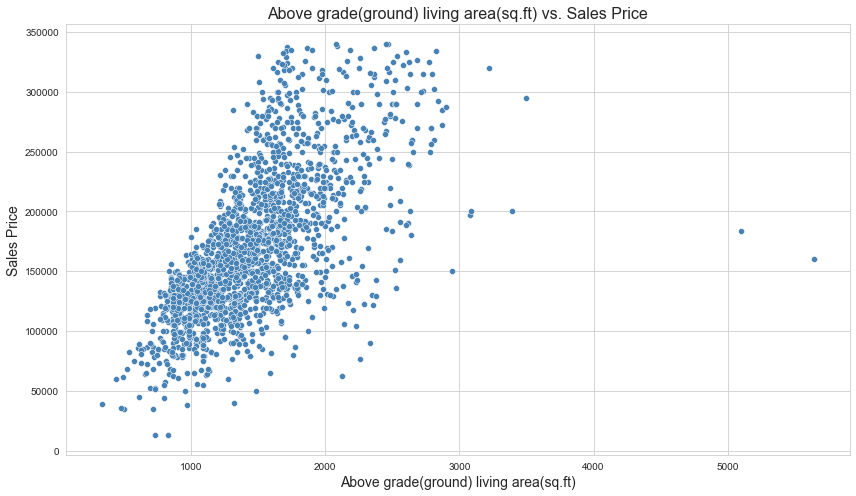

In [39]:
plt.figure(figsize = (12,7))
plt.title('Above grade(ground) living area(sq.ft) vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Above grade(ground) living area(sq.ft)', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train,x=train['gr_liv_area'], y=train['saleprice'],color='steelblue');
plt.tight_layout()

In [40]:
def outlier_selector(data,cols):
    print(data[f'{cols}'].describe())
#25th & 75th percentiles
    saleprice_25 = np.percentile(data[f'{cols}'],25)
    saleprice_75 = np.percentile(data[cols],75)
#calculate Interquartile range
    saleprice_iqr = saleprice_75 - saleprice_25
#calculate outlier Cutoff
    sp_cutoff = saleprice_iqr * 1.5
#upper & lower cut off points
    upper_cutoff = saleprice_75 + sp_cutoff
    lower_cutoff = saleprice_25 - sp_cutoff
    outliers = data[data[cols] > upper_cutoff]
    data.drop(outliers.index, inplace = True)
    return(f'upper cutoff: {upper_cutoff}, lower cutoff: {lower_cutoff}')
    

In [41]:
outlier_selector(train,'gr_liv_area')

count    1934.000000
mean     1454.634436
std       459.375938
min       334.000000
25%      1114.000000
50%      1419.000000
75%      1689.000000
max      5642.000000
Name: gr_liv_area, dtype: float64


'upper cutoff: 2551.5, lower cutoff: 251.5'

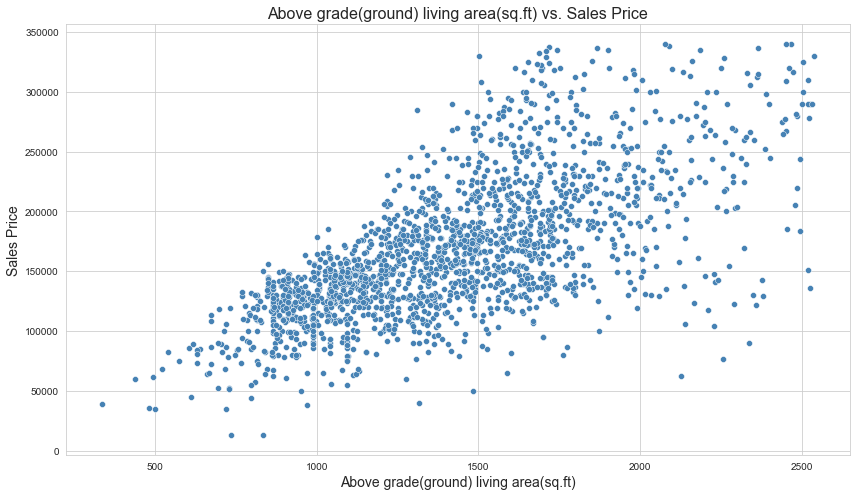

In [42]:
plt.figure(figsize = (12,7))
plt.title('Above grade(ground) living area(sq.ft) vs. Sales Price',fontdict={'fontsize': 16})
plt.xlabel('Above grade(ground) living area(sq.ft)', fontdict={'fontsize': 14})
plt.ylabel('Sales Price', fontdict={'fontsize': 14})
sns.scatterplot(data= train,x=train['gr_liv_area'], y=train['saleprice'],color='steelblue');
plt.tight_layout()

In [43]:
train.corr()[['saleprice']].sort_values(by='saleprice', ascending=False)

saleprice
saleprice           1.000000
overall_qual        0.793205
gr_liv_area         0.667518
garage_cars         0.623645
year_built          0.623426
garage_area         0.606708
total_bsmt_sf       0.595515
year_remod/add      0.581020
1st_flr_sf          0.561945
full_bath           0.542426
garage_yr_blt_imp   0.533053
fireplaces          0.454811
totrms_abvgrd       0.409558
bsmtfin_sf_1        0.377668
mas_vnr_area        0.364674
open_porch_sf       0.316917
wood_deck_sf        0.289156
lot_frontage_imp    0.273833
bsmt_full_bath      0.262146
lot_area            0.254871
half_bath           0.242377
2nd_flr_sf          0.209833
bsmt_unf_sf         0.177729
bedroom_abvgr       0.114591
screen_porch        0.085479
3ssn_porch          0.062000
pool_area           0.019156
mo_sold             0.013551
bsmtfin_sf_2        0.001731
misc_val            0.001393
yr_sold            -0.000384
bsmt_half_bath     -0.030333
id                 -0.048765
ms_subclass        -0.059393
overall_cond       -0.060878
low_qual_fin_sf    -0.080043
kitchen_abvgr      -0.145207
enclosed_porch     -0.157956
pid                -0.209372

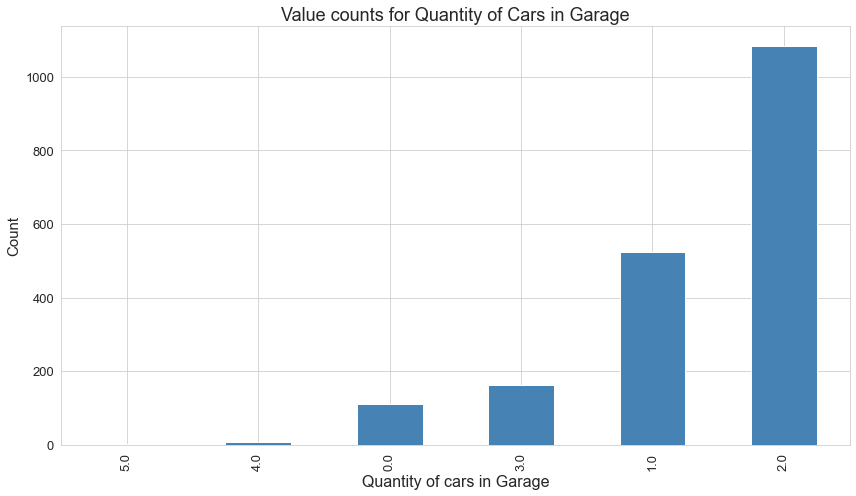

In [44]:
plt.figure(figsize = (12,7))
plt.title('Value counts for Quantity of Cars in Garage', fontsize = 18)
plt.xlabel('Quantity of cars in Garage', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Count', fontsize = 15)
plt.yticks(fontsize = 13)
train['garage_cars'].value_counts().sort_values(ascending=True).plot(kind = 'bar', color ='steelblue')
plt.tight_layout();

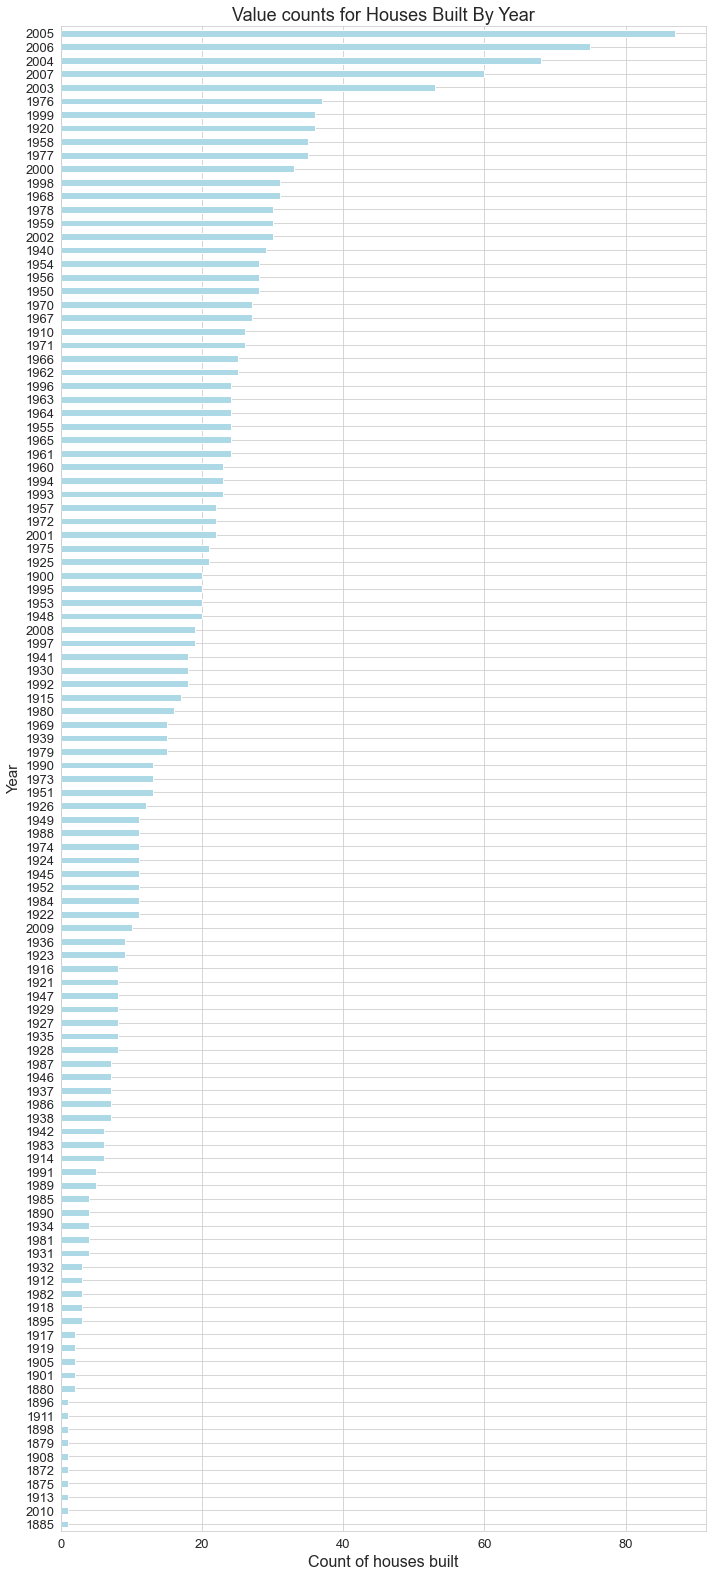

In [45]:
plt.figure(figsize = (10,22))
plt.title('Value counts for Houses Built By Year', fontsize = 18)
plt.xlabel('Count of houses built', fontsize = 16)
plt.xticks(fontsize = 13)
plt.ylabel('Year', fontsize = 15)
plt.yticks(fontsize = 13)
train['year_built'].value_counts().sort_values(ascending=True).plot(kind = 'barh', color ='lightblue')
plt.tight_layout();


It looks like 2003 through 2007 is the period by which the large amount of development in terms of building houses occurred.  

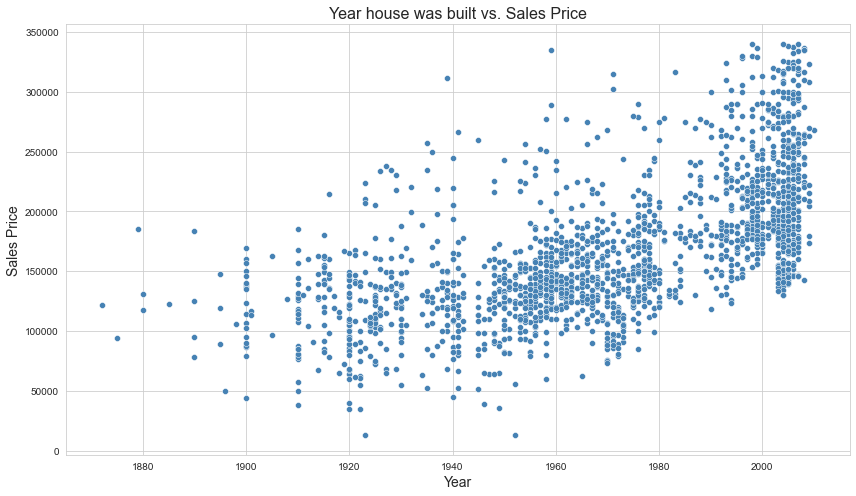

In [46]:
plt.figure(figsize = (12,7))
plt.title('Year house was built vs. Sales Price',fontsize = 16)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Sales Price', fontsize = 14)
sns.scatterplot(data= train,x=train['year_built'],
                y=train['saleprice'],color='steelblue');
plt.tight_layout()

Also worth noting that houses built more recently have fetched a higher sales price.

In [47]:
train['total_sf']=train['total_bsmt_sf']+ train['1st_flr_sf'] + train['2nd_flr_sf'] + train['open_porch_sf'] + train['wood_deck_sf']

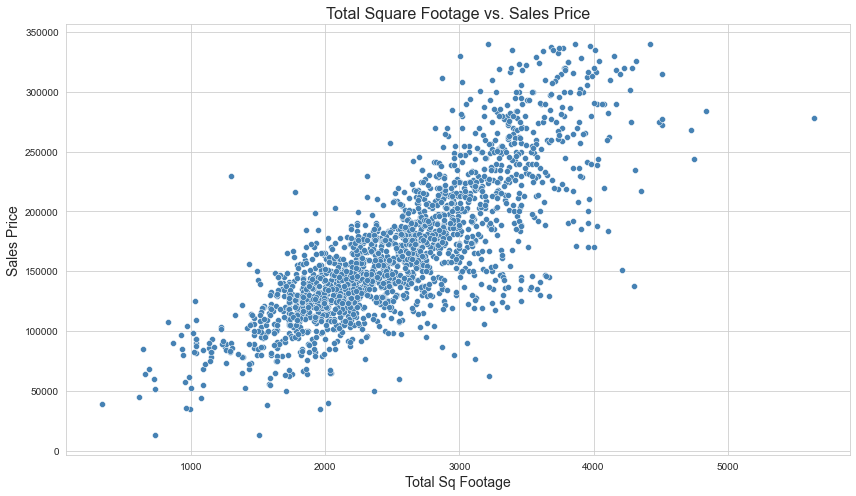

In [48]:
plt.figure(figsize = (12,7))
plt.title('Total Square Footage vs. Sales Price',fontsize = 16)
plt.xlabel('Total Sq Footage', fontsize = 14)
plt.ylabel('Sales Price', fontsize = 14)
sns.scatterplot(data= train,x=train['total_sf'],
                y=train['saleprice'],color='steelblue');
plt.tight_layout()

### Ordinal encoding

Focus on ordinal columns and transform them.  That is those columns whose categories have a rank value. 

In [49]:
#Using data dictionary along with this will select ordinal features
train.dtypes

id                      int64
pid                     int64
ms_subclass             int64
ms_zoning              object
lot_area                int64
street                 object
lot_shape              object
land_contour           object
utilities              object
lot_config             object
land_slope             object
neighborhood           object
condition_1            object
condition_2            object
bldg_type              object
house_style            object
overall_qual            int64
overall_cond            int64
year_built              int64
year_remod/add          int64
roof_style             object
roof_matl              object
exterior_1st           object
exterior_2nd           object
mas_vnr_type           object
mas_vnr_area          float64
exter_qual             object
exter_cond             object
foundation             object
bsmtfin_sf_1          float64
bsmtfin_sf_2          float64
bsmt_unf_sf           float64
total_bsmt_sf         float64
heating   

In [50]:
train['heating_qc'].value_counts()

Ex    928
TA    584
Gd    307
Fa     66
Po      3
Name: heating_qc, dtype: int64

In [51]:
oe_heatqc = OrdinalEncoder(categories=[['Po','Fa','Gd','TA','Ex']])

In [52]:
train['heating_qc_oe']= oe_heatqc.fit_transform(train[['heating_qc']])

In [53]:
train.head()

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating heating_qc central_air electrical  \
0        192.0          725.0    GasA         Ex           Y      SBrkr   
1        276.0          913.0    GasA         Ex           Y      SBrkr   
2        326.0         1057.0    GasA         TA           Y      SBrkr   
3        384.0          384.0    GasA         Gd           Y      SBrkr   
4        676.0          676.0    GasA         TA           Y      SBrkr   

   1st_flr_sf  2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  \
0         725         754                0         1479             0.0   
1         913        1209                0         2122             1.0   
2        1057           0                0         1057             1.0   
3         744         700                0         1444             0.0   
4         831         614                0         1445             0.0   

   bsmt_half_bath  full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  \
0             0.0          2          1              3              1   
1             0.0          2          1              4              1   
2             0.0          1          0              3              1   
3             0.0          2          1              3              1   
4             0.0          2          0              3              1   

  kitchen_qual  totrms_abvgrd functional  fireplaces  garage_cars  \
0           Gd              6        Typ           0          2.0   
1           Gd              8        Typ           1          2.0   
2           Gd              5        Typ           0          1.0   
3           TA              7        Typ           0          2.0 

In [54]:
train.drop(columns= 'heating_qc', inplace= True)

In [55]:
np.unique(train['kitchen_qual'].values)

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

In [56]:
train['kitchen_qual'].value_counts()

TA    1031
Gd     734
Ex      77
Fa      46
Name: kitchen_qual, dtype: int64

In [57]:
def one_hot_transform(data,col,category_list):
    oe = OrdinalEncoder(categories=[category_list])
    data[f'{col}_oe'] = oe.fit_transform(data[[col]])
    data.drop(columns = col, inplace = True)#added as part of workflow
    return data.head()

In [58]:
one_hot_transform(train,'kitchen_qual',['Fa','Gd','TA','Ex'])

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating central_air electrical  1st_flr_sf  \
0        192.0          725.0    GasA           Y      SBrkr         725   
1        276.0          913.0    GasA           Y      SBrkr         913   
2        326.0         1057.0    GasA           Y      SBrkr        1057   
3        384.0          384.0    GasA           Y      SBrkr         744   
4        676.0          676.0    GasA           Y      SBrkr         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  \
0          2          1              3              1              6   
1          2          1              4              1              8   
2          1          0              3              1              5   
3          2          1              3              1              7   
4          2          0              3              1              6   

  functional  fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0        Typ           0          2.0        475.0           Y             0   
1        Typ           1          2.0        559.0           Y             0   
2        Typ           0          1.0        246.0           Y             0  

In [59]:
# allows to check for correlation to a column quickly
def corr_to_target(data, col):
    return data.corr()[[col]].sort_values(by= col , ascending=False)

In [60]:
# get list of unique values for a column
def unique_vals_col(data,col):
    return np.unique(data[col].values)

In [61]:
# testing out unique values from a column function
unique_vals_col(train, 'bsmt_qual_imp')

array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object)

In [62]:
one_hot_transform(train,'bsmt_qual_imp',['Po','Fa','Gd','TA','Ex'])

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config land_slope neighborhood condition_1  \
0          Lvl    AllPub    CulDSac        Gtl       Sawyer        RRAe   
1          Lvl    AllPub    CulDSac        Gtl      SawyerW        Norm   
2          Lvl    AllPub     Inside        Gtl        NAmes        Norm   
3          Lvl    AllPub     Inside        Gtl       Timber        Norm   
4          Lvl    AllPub     Inside        Gtl      SawyerW        Norm   

  condition_2 bldg_type house_style  overall_qual  overall_cond  year_built  \
0        Norm      1Fam      2Story             6             8        1976   
1        Norm      1Fam      2Story             7             5        1996   
2        Norm      1Fam      1Story             5             7        1953   
3        Norm      1Fam      2Story             5             5        2006   
4        Norm      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating central_air electrical  1st_flr_sf  \
0        192.0          725.0    GasA           Y      SBrkr         725   
1        276.0          913.0    GasA           Y      SBrkr         913   
2        326.0         1057.0    GasA           Y      SBrkr        1057   
3        384.0          384.0    GasA           Y      SBrkr         744   
4        676.0          676.0    GasA           Y      SBrkr         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  \
0          2          1              3              1              6   
1          2          1              4              1              8   
2          1          0              3              1              5   
3          2          1              3              1              7   
4          2          0              3              1              6   

  functional  fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0        Typ           0          2.0        475.0           Y             0   
1        Typ           1          2.0        559.0           Y             0   
2        Typ           0          1.0        246.0           Y             0  

In [63]:
unique_vals_col(train,'land_slope')

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [64]:
one_hot_transform(train,'land_slope',['Sev','Mod','Gtl'])

id        pid  ms_subclass ms_zoning  lot_area street lot_shape  \
0  109  533352170           60        RL     13517   Pave       IR1   
1  544  531379050           60        RL     11492   Pave       IR1   
2  153  535304180           20        RL      7922   Pave       Reg   
3  318  916386060           60        RL      9802   Pave       Reg   
4  255  906425045           50        RL     14235   Pave       IR1   

  land_contour utilities lot_config neighborhood condition_1 condition_2  \
0          Lvl    AllPub    CulDSac       Sawyer        RRAe        Norm   
1          Lvl    AllPub    CulDSac      SawyerW        Norm        Norm   
2          Lvl    AllPub     Inside        NAmes        Norm        Norm   
3          Lvl    AllPub     Inside       Timber        Norm        Norm   
4          Lvl    AllPub     Inside      SawyerW        Norm        Norm   

  bldg_type house_style  overall_qual  overall_cond  year_built  \
0      1Fam      2Story             6             8        1976   
1      1Fam      2Story             7             5        1996   
2      1Fam      1Story             5             7        1953   
3      1Fam      2Story             5             5        2006   
4      1Fam      1.5Fin             6             8        1900   

   year_remod/add roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  \
0            2005      Gable   CompShg      HdBoard      Plywood      BrkFace   
1            1997      Gable   CompShg      VinylSd      VinylSd      BrkFace   
2            2007      Gable   CompShg      VinylSd      VinylSd         None   
3            2007      Gable   CompShg      VinylSd      VinylSd         None   
4            1993      Gable   CompShg      Wd Sdng      Plywood         None   

   mas_vnr_area exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  \
0         289.0         Gd         TA     CBlock         533.0           0.0   
1         132.0         Gd         TA      PConc         637.0           0.0   
2           0.0         TA         Gd     CBlock         731.0           0.0   
3           0.0         TA         TA      PConc           0.0           0.0   
4           0.0         TA         TA      PConc           0.0           0.0   

   bsmt_unf_sf  total_bsmt_sf heating central_air electrical  1st_flr_sf  \
0        192.0          725.0    GasA           Y      SBrkr         725   
1        276.0          913.0    GasA           Y      SBrkr         913   
2        326.0         1057.0    GasA           Y      SBrkr        1057   
3        384.0          384.0    GasA           Y      SBrkr         744   
4        676.0          676.0    GasA           Y      SBrkr         831   

   2nd_flr_sf  low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  \
0         754                0         1479             0.0             0.0   
1        1209                0         2122             1.0             0.0   
2           0                0         1057             1.0             0.0   
3         700                0         1444             0.0             0.0   
4         614                0         1445             0.0             0.0   

   full_bath  half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  \
0          2          1              3              1              6   
1          2          1              4              1              8   
2          1          0              3              1              5   
3          2          1              3              1              7   
4          2          0              3              1              6   

  functional  fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0        Typ           0          2.0        475.0           Y             0   
1        Typ           1          2.0        559.0           Y             0   
2        Typ           0          1.0        246.0           Y             0   
3        Typ           0          2.0        400.0           Y  

In [65]:
unique_vals_col(train,'lot_shape')

array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object)

In [66]:
one_hot_transform(train,'lot_shape',['IR3','IR2','IR1','Reg'])

id        pid  ms_subclass ms_zoning  lot_area street land_contour  \
0  109  533352170           60        RL     13517   Pave          Lvl   
1  544  531379050           60        RL     11492   Pave          Lvl   
2  153  535304180           20        RL      7922   Pave          Lvl   
3  318  916386060           60        RL      9802   Pave          Lvl   
4  255  906425045           50        RL     14235   Pave          Lvl   

  utilities lot_config neighborhood condition_1 condition_2 bldg_type  \
0    AllPub    CulDSac       Sawyer        RRAe        Norm      1Fam   
1    AllPub    CulDSac      SawyerW        Norm        Norm      1Fam   
2    AllPub     Inside        NAmes        Norm        Norm      1Fam   
3    AllPub     Inside       Timber        Norm        Norm      1Fam   
4    AllPub     Inside      SawyerW        Norm        Norm      1Fam   

  house_style  overall_qual  overall_cond  year_built  year_remod/add  \
0      2Story             6             8        1976            2005   
1      2Story             7             5        1996            1997   
2      1Story             5             7        1953            2007   
3      2Story             5             5        2006            2007   
4      1.5Fin             6             8        1900            1993   

  roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  \
0      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0   
1      Gable   CompShg      VinylSd      VinylSd      BrkFace         132.0   
2      Gable   CompShg      VinylSd      VinylSd         None           0.0   
3      Gable   CompShg      VinylSd      VinylSd         None           0.0   
4      Gable   CompShg      Wd Sdng      Plywood         None           0.0   

  exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  \
0         Gd         TA     CBlock         533.0           0.0        192.0   
1         Gd         TA      PConc         637.0           0.0        276.0   
2         TA         Gd     CBlock         731.0           0.0        326.0   
3         TA         TA      PConc           0.0           0.0        384.0   
4         TA         TA      PConc           0.0           0.0        676.0   

   total_bsmt_sf heating central_air electrical  1st_flr_sf  2nd_flr_sf  \
0          725.0    GasA           Y      SBrkr         725         754   
1          913.0    GasA           Y      SBrkr         913        1209   
2         1057.0    GasA           Y      SBrkr        1057           0   
3          384.0    GasA           Y      SBrkr         744         700   
4          676.0    GasA           Y      SBrkr         831         614   

   low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4                0         1445             0.0             0.0          2   

   half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd functional  \
0          1              3              1              6        Typ   
1          1              4              1              8        Typ   
2          0              3              1              5        Typ   
3          1              3              1              7        Typ   
4          0              3              1              6        Typ   

   fireplaces  garage_cars  garage_area paved_drive  wood_deck_sf  \
0           0          2.0        475.0           Y             0   
1           1          2.0        559.0           Y             0   
2           0          1.0        246.0           Y             0   
3           0          2.0        400.0           Y           100   
4           0          2.0       

In [67]:
unique_vals_col(train,'functional')

array(['Maj1', 'Maj2', 'Min1', 'Min2', 'Mod', 'Sal', 'Sev', 'Typ'],
      dtype=object)

In [68]:
one_hot_transform(train,'functional',['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'])

id        pid  ms_subclass ms_zoning  lot_area street land_contour  \
0  109  533352170           60        RL     13517   Pave          Lvl   
1  544  531379050           60        RL     11492   Pave          Lvl   
2  153  535304180           20        RL      7922   Pave          Lvl   
3  318  916386060           60        RL      9802   Pave          Lvl   
4  255  906425045           50        RL     14235   Pave          Lvl   

  utilities lot_config neighborhood condition_1 condition_2 bldg_type  \
0    AllPub    CulDSac       Sawyer        RRAe        Norm      1Fam   
1    AllPub    CulDSac      SawyerW        Norm        Norm      1Fam   
2    AllPub     Inside        NAmes        Norm        Norm      1Fam   
3    AllPub     Inside       Timber        Norm        Norm      1Fam   
4    AllPub     Inside      SawyerW        Norm        Norm      1Fam   

  house_style  overall_qual  overall_cond  year_built  year_remod/add  \
0      2Story             6             8        1976            2005   
1      2Story             7             5        1996            1997   
2      1Story             5             7        1953            2007   
3      2Story             5             5        2006            2007   
4      1.5Fin             6             8        1900            1993   

  roof_style roof_matl exterior_1st exterior_2nd mas_vnr_type  mas_vnr_area  \
0      Gable   CompShg      HdBoard      Plywood      BrkFace         289.0   
1      Gable   CompShg      VinylSd      VinylSd      BrkFace         132.0   
2      Gable   CompShg      VinylSd      VinylSd         None           0.0   
3      Gable   CompShg      VinylSd      VinylSd         None           0.0   
4      Gable   CompShg      Wd Sdng      Plywood         None           0.0   

  exter_qual exter_cond foundation  bsmtfin_sf_1  bsmtfin_sf_2  bsmt_unf_sf  \
0         Gd         TA     CBlock         533.0           0.0        192.0   
1         Gd         TA      PConc         637.0           0.0        276.0   
2         TA         Gd     CBlock         731.0           0.0        326.0   
3         TA         TA      PConc           0.0           0.0        384.0   
4         TA         TA      PConc           0.0           0.0        676.0   

   total_bsmt_sf heating central_air electrical  1st_flr_sf  2nd_flr_sf  \
0          725.0    GasA           Y      SBrkr         725         754   
1          913.0    GasA           Y      SBrkr         913        1209   
2         1057.0    GasA           Y      SBrkr        1057           0   
3          384.0    GasA           Y      SBrkr         744         700   
4          676.0    GasA           Y      SBrkr         831         614   

   low_qual_fin_sf  gr_liv_area  bsmt_full_bath  bsmt_half_bath  full_bath  \
0                0         1479             0.0             0.0          2   
1                0         2122             1.0             0.0          2   
2                0         1057             1.0             0.0          1   
3                0         1444             0.0             0.0          2   
4                0         1445             0.0             0.0          2   

   half_bath  bedroom_abvgr  kitchen_abvgr  totrms_abvgrd  fireplaces  \
0          1              3              1              6           0   
1          1              4              1              8           1   
2          0              3              1              5           0   
3          1              3              1              7           0   
4          0              3              1              6           0   

   garage_cars  garage_area paved_drive  wood_deck_sf  open_porch_sf  \
0          2.0        475.0           Y             0             44   
1          2.0        559.0           Y             0             74   
2          1.0        246.0           Y             0             52   
3          2.0        400.0           Y           100              0   
4          2

### Make two columns into numeric Binary values

In [69]:
# Applied lambda function to binarize these two categories.  
train['paved_drive']=train['paved_drive'].apply(lambda x:1 if x=='Y' else 0)
train['central_air']=train['central_air'].apply(lambda x:1 if x=='Y' else 0)

### Get Dummies for categorical columns

In [70]:
# get dummies applied to nominal/categorical features
train = pd.get_dummies(data= train,
               columns=['ms_subclass','ms_zoning','neighborhood','bldg_type',
                        'lot_config','house_style','roof_style','exterior_1st',
                       'exterior_2nd','mas_vnr_type','foundation'
                       ],
               drop_first=True)

### Create more features

In [71]:
train[['overall_qual']].describe()

overall_qual
count   1888.000000
mean       5.945445
std        1.305766
min        1.000000
25%        5.000000
50%        6.000000
75%        7.000000
max       10.000000

In [72]:
train['overall_qual'].value_counts()

5     556
6     490
7     409
8     198
4     158
9      33
3      29
2       9
1       4
10      2
Name: overall_qual, dtype: int64

In [73]:
# Feature engineer a column and chose 7 since it is the 75th percentile value
train['high_qual'] = (train['overall_qual'] >= 7).astype(int)


In [74]:
#not totally lopsided/somewhat balanced
train['high_qual'].value_counts()

0    1246
1     642
Name: high_qual, dtype: int64

In [75]:
#create function in order to create features where if >=75th percentile, then 1, else 0
def feat_75_percentile(data,col):
    percentile_75 = np.percentile(data[col],75)
    data[f'high_{col}']=(data[col] >= percentile_75).astype(int)
    return data.head(3)

In [76]:
# list of numerical/ordinal columns to do these on
col_list_ft_eng = ['gr_liv_area','year_remod/add','heating_qc_oe',
                   'functional_oe','fireplaces','total_sf'] 

In [77]:
# list comprehension to execute feat_75..function on these columns in one go. 
[feat_75_percentile(train,cols) for cols in col_list_ft_eng]

[    id        pid  lot_area street land_contour utilities condition_1  \
 0  109  533352170     13517   Pave          Lvl    AllPub        RRAe   
 1  544  531379050     11492   Pave          Lvl    AllPub        Norm   
 2  153  535304180      7922   Pave          Lvl    AllPub        Norm   
 
   condition_2  overall_qual  overall_cond  year_built  year_remod/add  \
 0        Norm             6             8        1976            2005   
 1        Norm             7             5        1996            1997   
 2        Norm             5             7        1953            2007   
 
   roof_matl  mas_vnr_area exter_qual exter_cond  bsmtfin_sf_1  bsmtfin_sf_2  \
 0   CompShg         289.0         Gd         TA         533.0           0.0   
 1   CompShg         132.0         Gd         TA         637.0           0.0   
 2   CompShg           0.0         TA         Gd         731.0           0.0   
 
    bsmt_unf_sf  total_bsmt_sf heating  central_air electrical  1st_flr_sf  \
 0  

In [78]:
#Rename columns to more accurately communicate what column does.
rename_dict = {'high_gr_liv_area':'best_gr_live_area', 'high_year_remod/add':'recent_remodel',
              'high_heating_qc_oe':'heatqc_is_ex', 'high_functional_oe':'is_typ_funct',
               'high_fireplaces':'has_fireplaces','high_total_sf':'massive_sf'}
train.rename(columns = rename_dict,inplace = True)

In [79]:
corr_to_target(train,'saleprice')

saleprice
saleprice           1.000000
total_sf            0.799209
overall_qual        0.793205
high_qual           0.680828
gr_liv_area         0.667518
...                      ...
ms_subclass_30     -0.296803
lot_shape_oe       -0.317207
ms_zoning_RM       -0.324096
foundation_CBlock  -0.337838
mas_vnr_type_None  -0.386626

[158 rows x 1 columns]

### Feature selection

In [80]:
# grab list of columns with correlations higher than . 3
corr_df = train.corr()[['saleprice']] > (.3)
corr_col_list = corr_df[corr_df['saleprice']==True].index
corr_col_list = [col for col in corr_col_list]
corr_col_list

['overall_qual',
 'year_built',
 'year_remod/add',
 'mas_vnr_area',
 'bsmtfin_sf_1',
 'total_bsmt_sf',
 'central_air',
 '1st_flr_sf',
 'gr_liv_area',
 'full_bath',
 'totrms_abvgrd',
 'fireplaces',
 'garage_cars',
 'garage_area',
 'paved_drive',
 'open_porch_sf',
 'saleprice',
 'garage_yr_blt_imp',
 'total_sf',
 'heating_qc_oe',
 'ms_subclass_60',
 'neighborhood_NridgHt',
 'exterior_1st_VinylSd',
 'exterior_2nd_VinylSd',
 'foundation_PConc',
 'high_qual',
 'best_gr_live_area',
 'recent_remodel',
 'heatqc_is_ex',
 'has_fireplaces',
 'massive_sf']

In [81]:
len(corr_col_list)

31

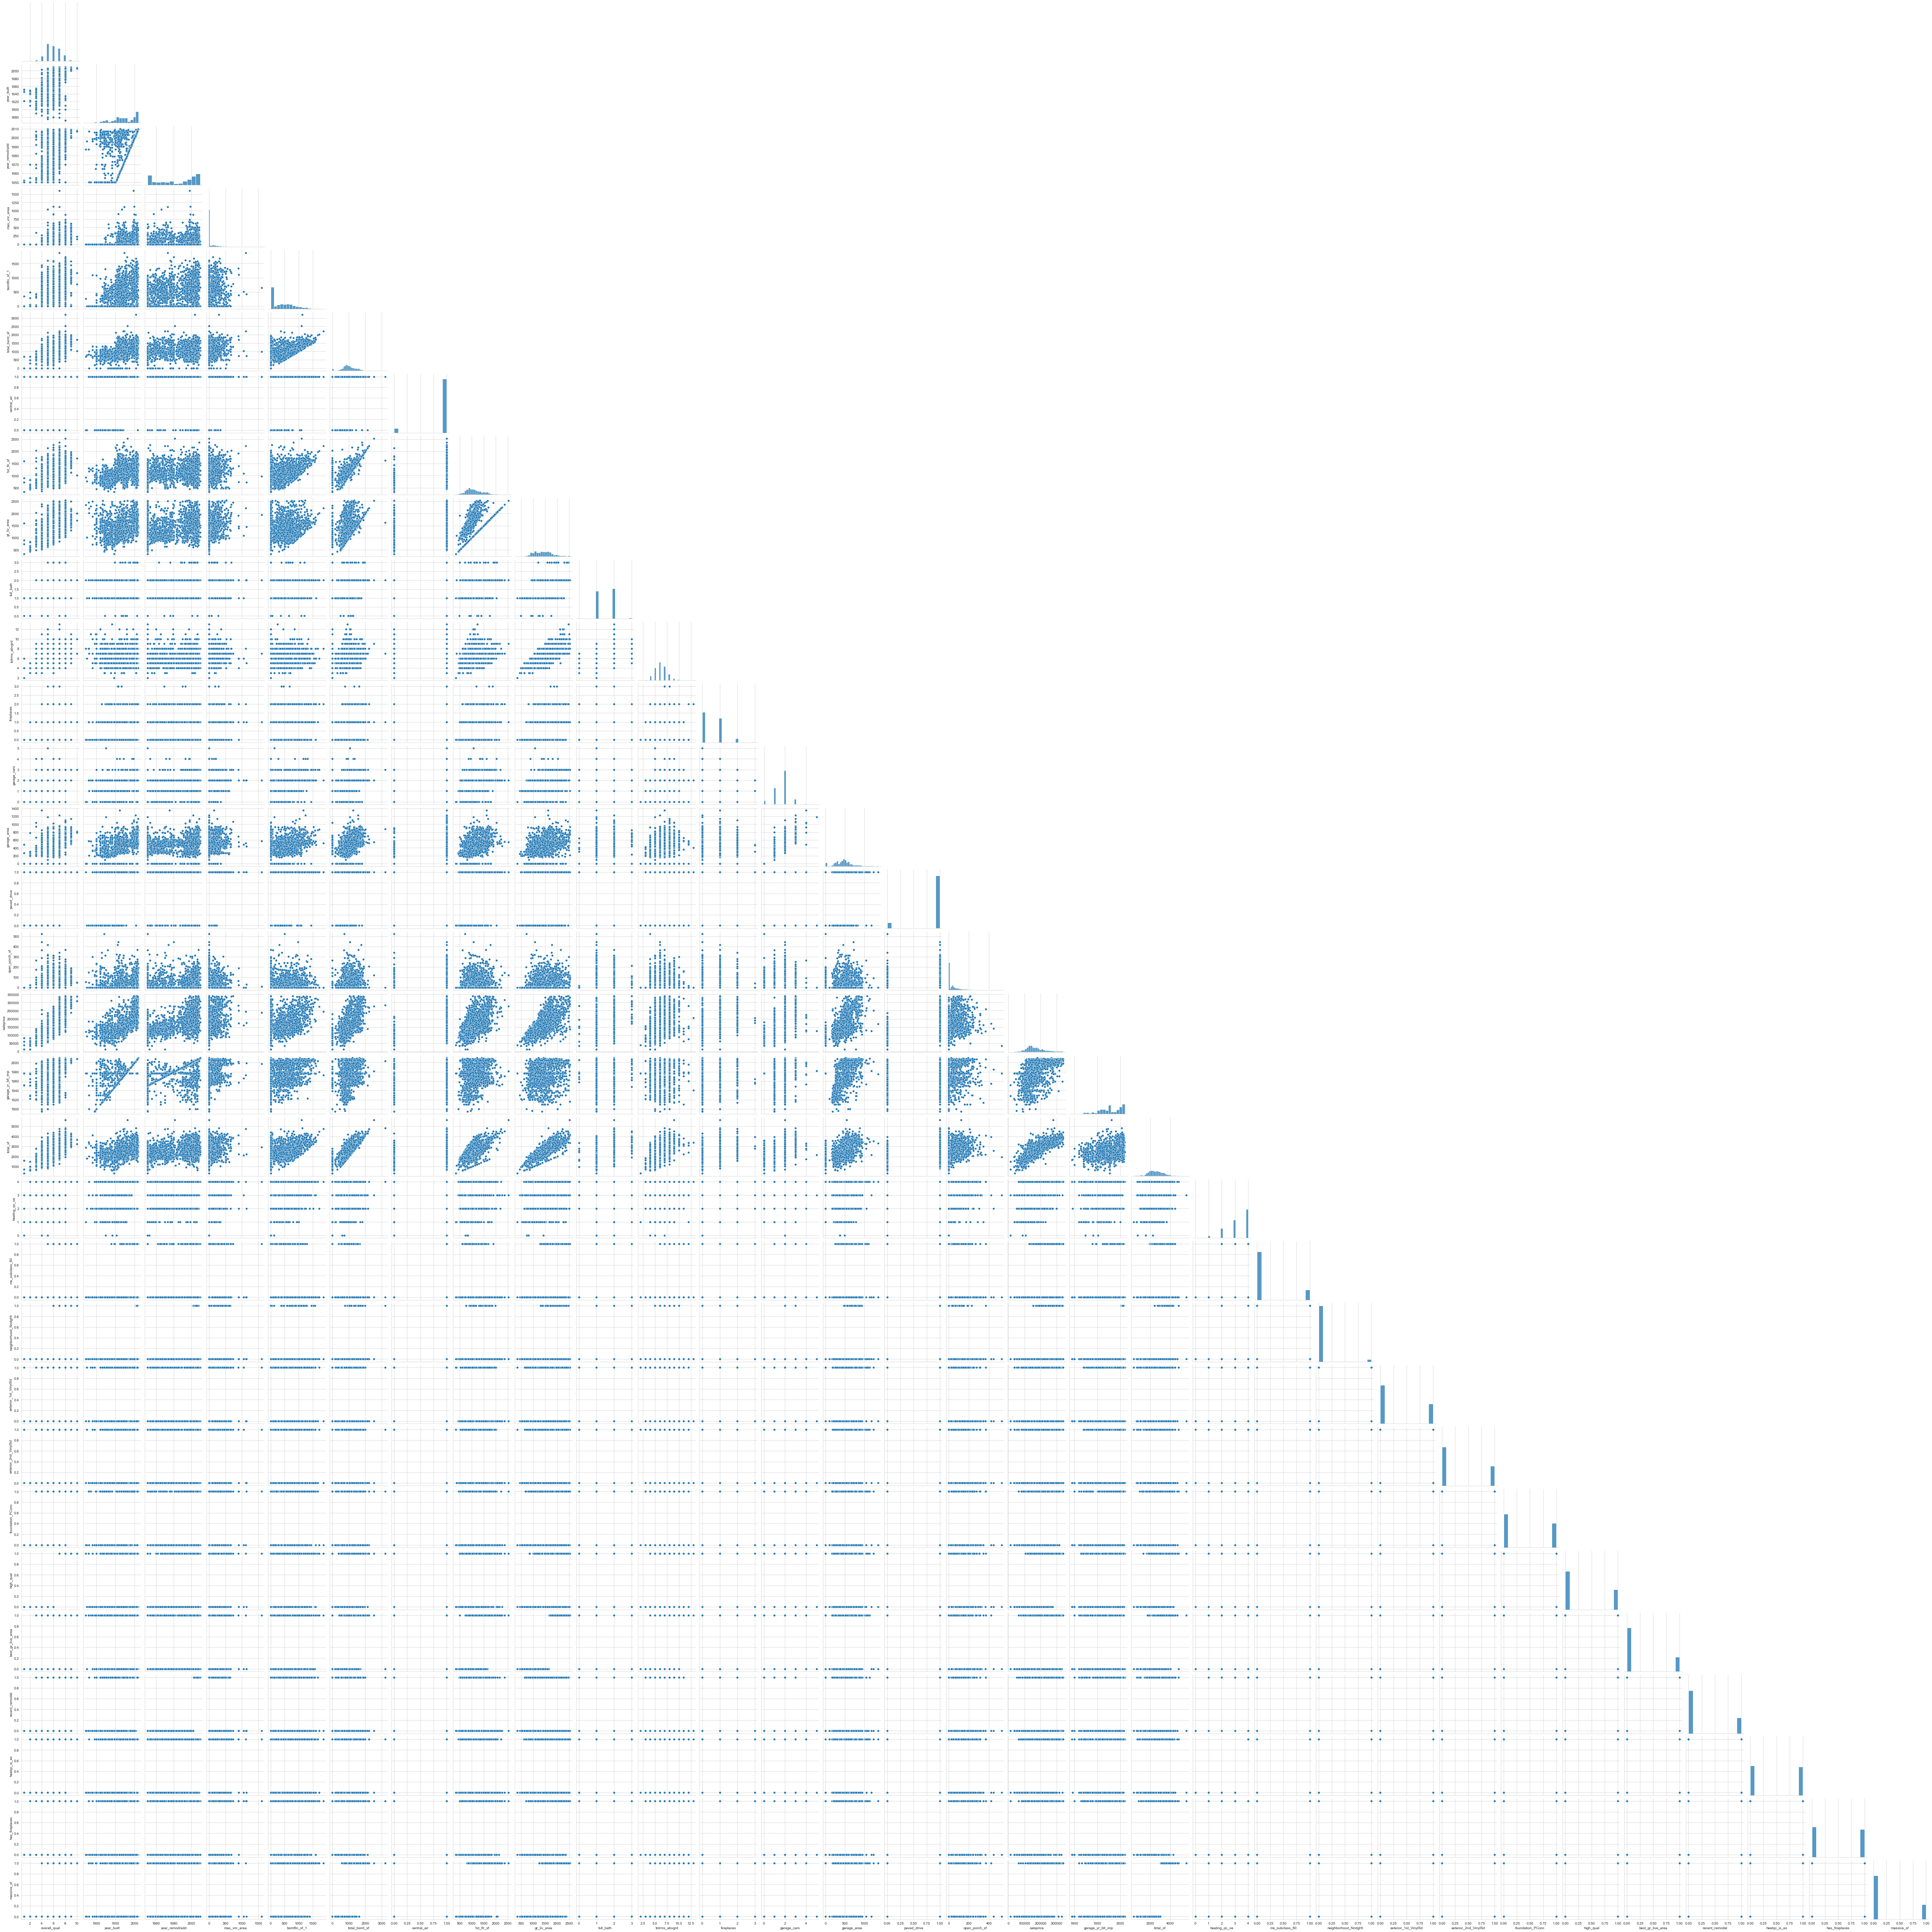

In [82]:
sns.pairplot(train[corr_col_list],corner=True);

In [83]:
new_train = pd.DataFrame(train, columns=corr_col_list)
new_train.head()

overall_qual  year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  \
0             6        1976            2005         289.0         533.0   
1             7        1996            1997         132.0         637.0   
2             5        1953            2007           0.0         731.0   
3             5        2006            2007           0.0           0.0   
4             6        1900            1993           0.0           0.0   

   total_bsmt_sf  central_air  1st_flr_sf  gr_liv_area  full_bath  \
0          725.0            1         725         1479          2   
1          913.0            1         913         2122          2   
2         1057.0            1        1057         1057          1   
3          384.0            1         744         1444          2   
4          676.0            1         831         1445          2   

   totrms_abvgrd  fireplaces  garage_cars  garage_area  paved_drive  \
0              6           0          2.0        475.0            1   
1              8           1          2.0        559.0            1   
2              5           0          1.0        246.0            1   
3              7           0          2.0        400.0            1   
4              6           0          2.0        484.0            0   

   open_porch_sf  saleprice  garage_yr_blt_imp  total_sf  heating_qc_oe  \
0             44     130500               1976    2248.0            4.0   
1             74     220000               1997    3109.0            4.0   
2             52     109000               1953    2166.0            3.0   
3              0     174000               2007    1928.0            2.0   
4             59     138500               1957    2180.0            3.0   

   ms_subclass_60  neighborhood_NridgHt  exterior_1st_VinylSd  \
0               1                     0                     0   
1               1                     0                     1   
2               0                     0                     1   
3               1                     0                     1   
4               0                     0                     0   

   exterior_2nd_VinylSd  foundation_PConc  high_qual  best_gr_live_area  \
0                     0                 0          0                  0   
1                     1                 1          1                  1   
2                     1                 0          0                  0   
3                     1                 1          0                  0   
4                     0                 1          0                  0   

   recent_remodel  heatqc_is_ex  has_fireplaces  massive_sf  
0               1             1               0           0  
1               0             1               1           1  
2               1             0               0           0  
3               1             0               0           0  
4               0             0               0           0

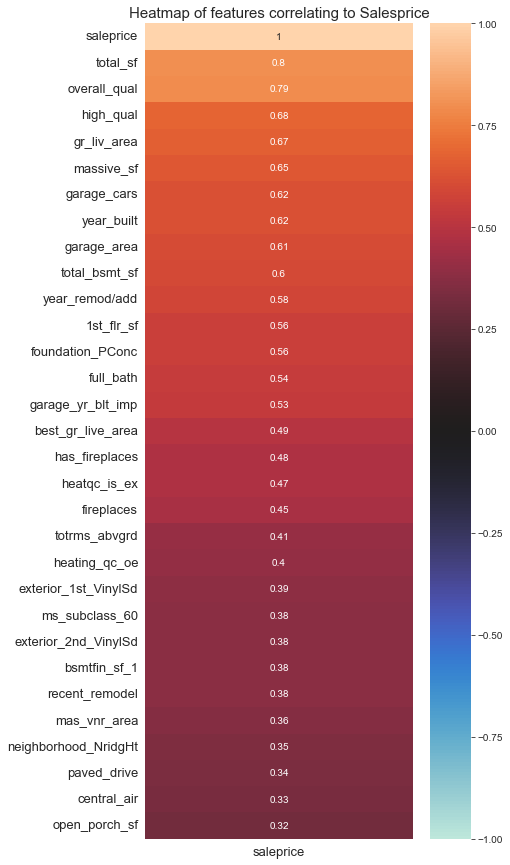

In [84]:
plt.figure(figsize=(6,15))
plt.title('Heatmap of features correlating to Salesprice', fontsize = 15)
plt.yticks(fontsize=13)
plt.xticks(fontsize =13)
sns.heatmap(corr_to_target(new_train,'saleprice'),
            cmap='icefire',annot = True, vmin = -1, vmax = 1);

In [85]:
new_train[['exterior_1st_VinylSd']].value_counts()

exterior_1st_VinylSd
0                       1248
1                        640
dtype: int64

In [86]:
new_train[['exterior_2nd_VinylSd']].value_counts()

exterior_2nd_VinylSd
0                       1252
1                        636
dtype: int64

In [87]:
new_train['both_exterior_VynilSd'] = ((new_train['exterior_1st_VinylSd'] == 1) & (new_train['exterior_2nd_VinylSd'] == 1)).astype(int)

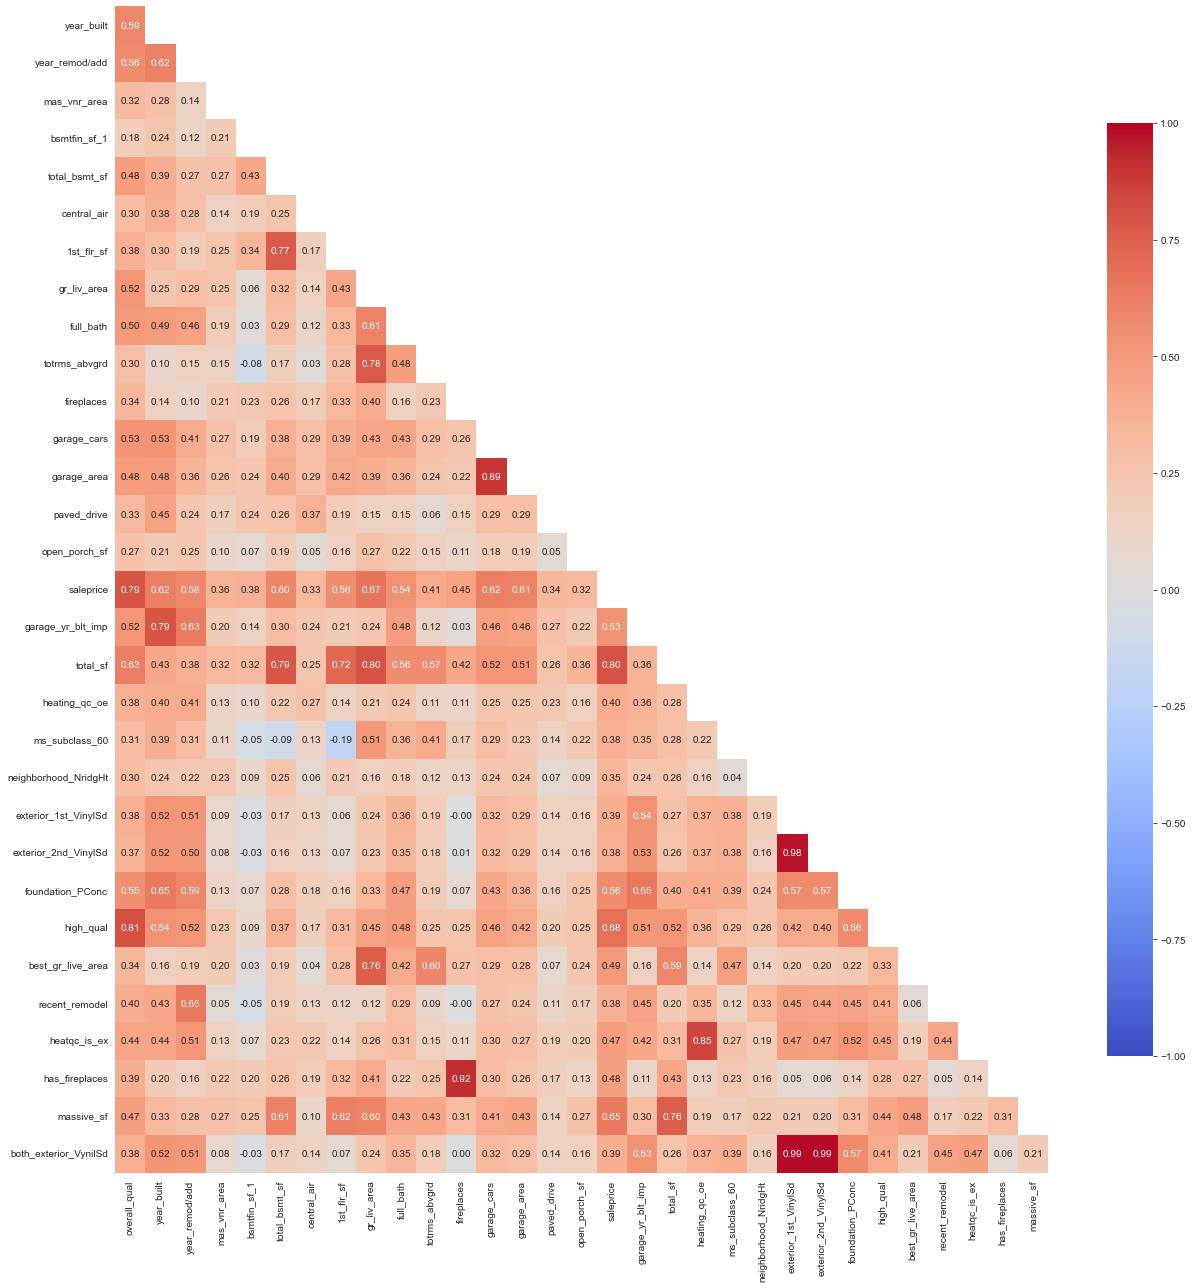

In [88]:
new_train_corr = new_train.corr()
mask = np.triu(np.ones_like(new_train_corr, dtype='bool'))
# adjust mask and df
mask = mask[1:, :-1]
corr = new_train_corr.iloc[1:,:-1].copy()
# plot heatmap
plt.figure(figsize = (18,18))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Get rid of features with correlation over .90 in order to minimize the multicollinearity between features.

In [89]:
new_train.drop(columns=['garage_area','exterior_1st_VinylSd','exterior_2nd_VinylSd','fireplaces'],inplace=True)

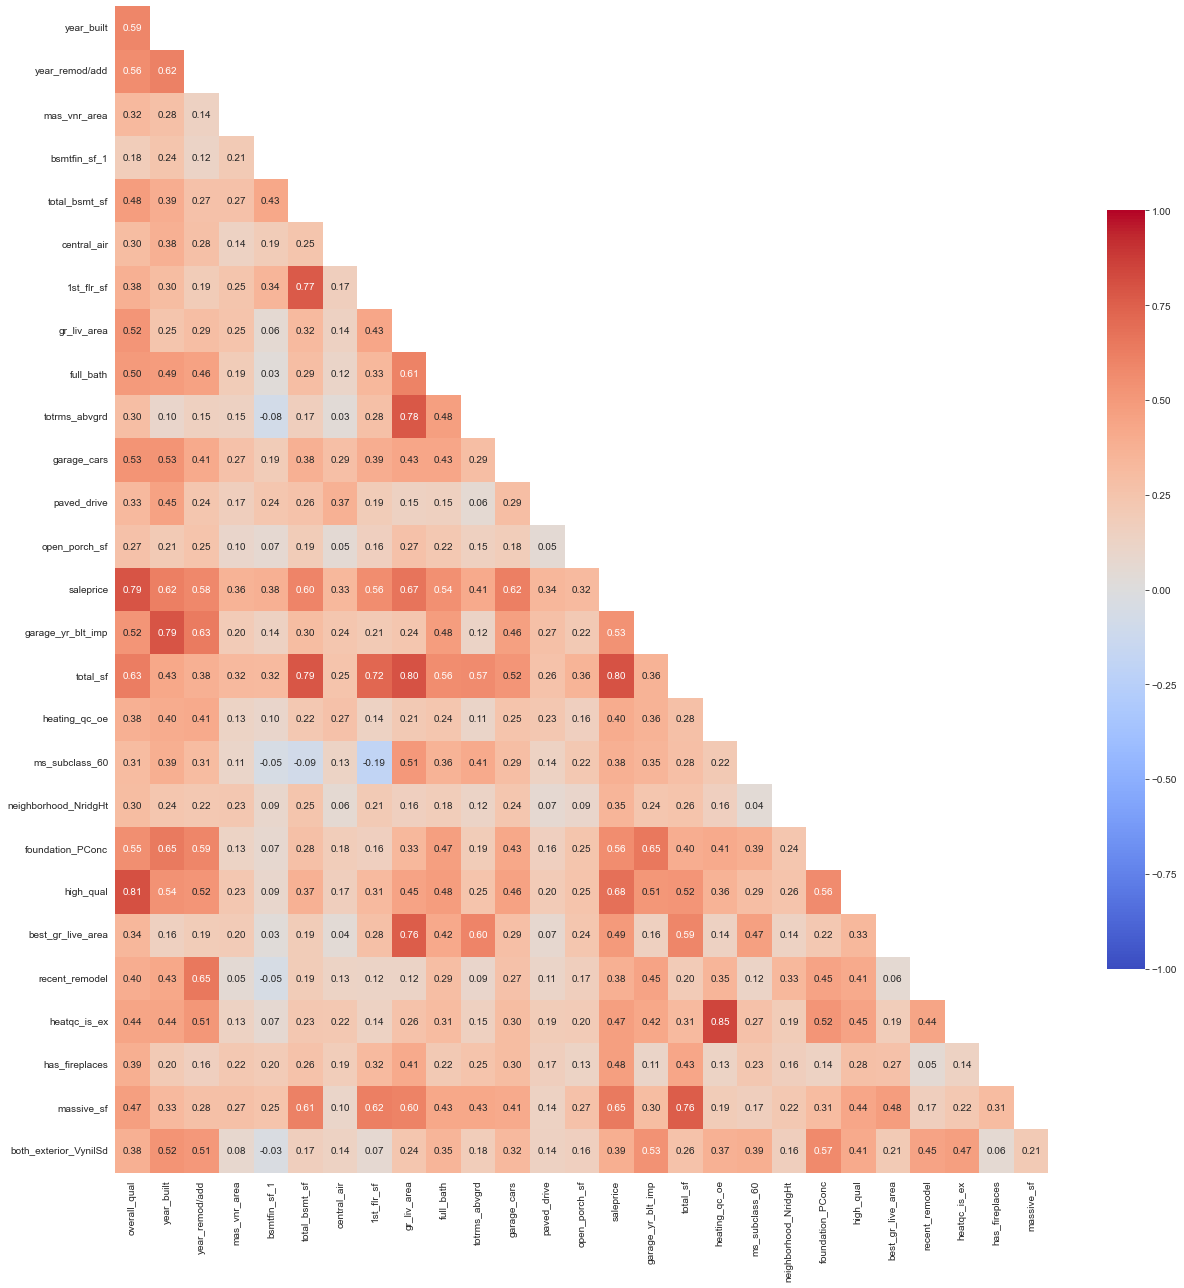

In [90]:
new_train_corr = new_train.corr()
mask = np.triu(np.ones_like(new_train_corr, dtype='bool'))
# adjust mask and df
mask = mask[1:, :-1]
corr = new_train_corr.iloc[1:,:-1].copy()
# plot heatmap
plt.figure(figsize = (18,18))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .65})
# yticks
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [92]:
new_train.to_csv('../datasets/new_train.csv', index = False)

In [94]:
features = [col for col in new_train.columns if col != 'saleprice']
X = new_train[features]
y = new_train['saleprice']

In [95]:
X.describe()

overall_qual   year_built  year_remod/add  mas_vnr_area  bsmtfin_sf_1  \
count   1888.000000  1888.000000     1888.000000   1888.000000   1888.000000   
mean       5.945445  1969.960275     1982.838453     81.130297    406.479343   
std        1.305766    29.802494       21.139626    146.013502    404.360785   
min        1.000000  1872.000000     1950.000000      0.000000      0.000000   
25%        5.000000  1952.000000     1962.000000      0.000000      0.000000   
50%        6.000000  1971.000000     1990.000000      0.000000    348.500000   
75%        7.000000  1999.000000     2003.000000    130.000000    692.500000   
max       10.000000  2010.000000     2010.000000   1600.000000   1880.000000   

       total_bsmt_sf  central_air   1st_flr_sf  gr_liv_area    full_bath  \
count    1888.000000  1888.000000  1888.000000  1888.000000  1888.000000   
mean     1008.354873     0.925847  1115.935911  1419.923729     1.530191   
std       385.409373     0.262088   332.430638   396.892467     0.528107   
min         0.000000     0.000000   334.000000   334.000000     0.000000   
25%       780.000000     1.000000   866.000000  1107.750000     1.000000   
50%       970.000000     1.000000  1061.500000  1402.000000     2.000000   
75%      1246.250000     1.000000  1337.000000  1666.000000     2.000000   
max      3206.000000     1.000000  2524.000000  2538.000000     3.000000   

       totrms_abvgrd  garage_cars  paved_drive  open_porch_sf  \
count    1888.000000  1888.000000  1888.000000    1888.000000   
mean        6.253178     1.702860     0.902542      43.247881   
std         1.376420     0.728082     0.296658      61.529033   
min         2.000000     0.000000     0.000000       0.000000   
25%         5.000000     1.000000     1.000000       0.000000   
50%         6.000000     2.000000     1.000000      22.000000   
75%         7.000000     2.000000     1.000000      64.000000   
max        13.000000     5.000000     1.000000     523.000000   

       garage_yr_blt_imp     total_sf  heating_qc_oe  ms_subclass_60  \
count        1888.000000  1888.000000    1888.000000     1888.000000   
mean         1976.876059  2553.222458       3.254237        0.171610   
std            24.172615   691.681852       0.862566        0.377141   
min          1895.000000   334.000000       0.000000        0.000000   
25%          1960.750000  2049.500000       3.000000        0.000000   
50%          1977.000000  2512.000000       3.000000        0.000000   
75%          2000.000000  3018.000000       4.000000        0.000000   
max          2010.000000  5642.000000       4.000000        1.000000   

       neighborhood_NridgHt  foundation_PConc    high_qual  best_gr_live_area  \
count           1888.000000       1888.000000  1888.000000        1888.000000   
mean               0.040254          0.421610     0.340042           0.251059   
std                0.196607          0.493948     0.473849           0.433737   
min                0.000000          0.000000     0.000000           0.000000   
25%                0.000000          0.000000     0.000000           0.000000   
50%                0.000000          0.000000     0.000000           0.000000   
75%                0.000000          1.000000     1.000000           1.000000   
max                1.000000          1.000000     1.000000           1.000000   

       recent_remodel  heatqc_is_ex  has_fireplaces   massive_sf  \
count     1888.000000   1888.000000     1888.000000  1888.000000   
mean         0.267479      0.491525        0.479343     0.250530   
std          0.442761      0.500061        0.499705     0.433433   
min          0.000000      0.000000        0.000000     0.000000   
25%          0.000000      0.000000        0.000000     0.000000   
50%          0.000000      0.000000        0.000000     0.000000   
75%          1.000000      1.000000        1.000000     1.000000   
max          1.000000      1.000000        1.000000     1.000000   

       both_exterior_Vy

### Train Test Split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= .7, random_state=42)
linreg = LinearRegression()

In [97]:
print(f'Cross val score for training set:{cross_val_score(linreg, X_train, y_train).mean()}')
print(f'Cross val score for testing set:{cross_val_score(linreg, X_test, y_test).mean()}')


Cross val score for training set:0.8577643394423567
Cross val score for testing set:0.8595615539325323


The established baseline score for training & testing in this instance is at 85.77% & 85.59%.  The model is actually not overfit or underfit.  The good sign is that there is no significant drop between the train and test scores, which lends itself to generalizing to new data at about the same rate.

### Model Fitting & Evaluation

In [98]:
linreg.fit(X_train,y_train)
print(f'Training score is:{linreg.score(X_train, y_train)}.')
print(f'Testing score is:{linreg.score(X_test, y_test)}.')

      

Training score is:0.8658760622082375.
Testing score is:0.8724551538814946.


In [101]:
linreg.coef_
linreg_coef = set(zip(X.columns,linreg.coef_))
linreg_coef

{('1st_flr_sf', 19.713055609578717),
 ('best_gr_live_area', 3541.049819870342),
 ('both_exterior_VynilSd', -2311.9644860969506),
 ('bsmtfin_sf_1', 21.78792287685506),
 ('central_air', 6259.1015975122455),
 ('foundation_PConc', 3639.177923055946),
 ('full_bath', -5261.3729922696575),
 ('garage_cars', 6671.885618241774),
 ('garage_yr_blt_imp', 12.184368009640991),
 ('gr_liv_area', 24.9470557752173),
 ('has_fireplaces', 7620.696645543778),
 ('heating_qc_oe', -1681.608876207112),
 ('heatqc_is_ex', 8876.393612486067),
 ('high_qual', 5096.329199365407),
 ('mas_vnr_area', 5.1388292812964504),
 ('massive_sf', 11728.195203306577),
 ('ms_subclass_60', 12557.245914580993),
 ('neighborhood_NridgHt', 16857.712552147583),
 ('open_porch_sf', 11.637749731339525),
 ('overall_qual', 11718.366702034742),
 ('paved_drive', 1941.0374968710187),
 ('recent_remodel', 4048.0881312503166),
 ('total_bsmt_sf', -3.120313997003649),
 ('total_sf', 10.240060286596247),
 ('totrms_abvgrd', -2047.593806367313),
 ('year_b

In [103]:
coeff_features = pd.DataFrame(linreg_coef,
             columns = ['feature','coefficient']).sort_values(by='coefficient', ascending=False)

In [137]:
top_ten_coeff = coeff_features[:11]

In [143]:
coeff_features

coefficient
feature                            
neighborhood_NridgHt   16857.712552
ms_subclass_60         12557.245915
massive_sf             11728.195203
overall_qual           11718.366702
heatqc_is_ex            8876.393612
has_fireplaces          7620.696646
garage_cars             6671.885618
central_air             6259.101598
high_qual               5096.329199
recent_remodel          4048.088131
foundation_PConc        3639.177923
best_gr_live_area       3541.049820
paved_drive             1941.037497
year_remod/add           260.072244
year_built               105.744225
gr_liv_area               24.947056
bsmtfin_sf_1              21.787923
1st_flr_sf                19.713056
garage_yr_blt_imp         12.184368
open_porch_sf             11.637750
total_sf                  10.240060
mas_vnr_area               5.138829
total_bsmt_sf             -3.120314
heating_qc_oe          -1681.608876
totrms_abvgrd          -2047.593806
both_exterior_VynilSd  -2311.964486
full_bath              -5261.372992

Holding all else constant, living in the neighborhood of Northridge Heights, increases value of home by $16,857.71.

In [148]:
top_ten_coeff.set_index(keys='feature',inplace = True)

KeyError: "None of ['feature'] are in the columns"

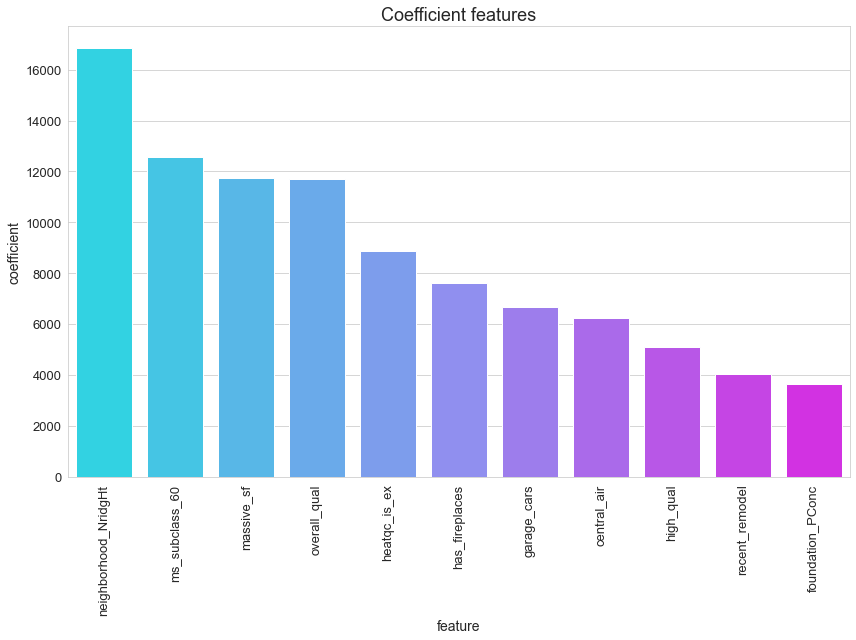

In [160]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = top_ten_coeff, x = top_ten_coeff.index, y = 'coefficient', palette='cool')
plt.tight_layout();


Top ten features based on their coefficients.
* Living in the neighborhood of Northridge heights.
* 2 story dwelling 1946 & newer
* Having massive square footage in the 75th percentile and above
* Overall quality


### Predictions

In [149]:
train_preds = linreg.predict(X_train)
test_preds = linreg.predict(X_test)

In [165]:
def run_metrics(ytrain, trainPreds, ytest,testPreds):
    mse_train = metrics.mean_squared_error(ytrain, trainPreds)
    mse_test =metrics.mean_squared_error(ytest, testPreds)
    rmse_train = metrics.mean_squared_error(ytrain, trainPreds, squared=False)
    rmse_test = metrics.mean_squared_error(ytest, testPreds, squared = False)
    r2_train = metrics.r2_score(ytrain,trainPreds)
    r2_test = metrics.r2_score(ytest,testPreds)
    adj_r2 = 1-(1-metrics.r2_score(y_test, test_preds)*(len(y_test-1)/(len(y_test)-len(features)-1)))
    print (f'The training MSE is {mse_train}, while the testing MSE is {mse_test}')
    print(f'The training RMSE is {rmse_train}, while the testing RMSE is {rmse_test}')
    print(f'R2 train score: {round(r2_train, 2)}, while R2 test score: {round(r2_test,2)}')
    print(f'Adj R2: {round(adj_r2,2)}')


    

In [166]:
run_metrics(y_train, train_preds, y_test, test_preds)

The training MSE is 454556326.22466004, while the testing MSE is 426113318.2440627
The training RMSE is 21320.326597513933, while the testing RMSE is 20642.512401451106
R2 train score: 0.87, while R2 test score: 0.87
Adj R2: 0.92


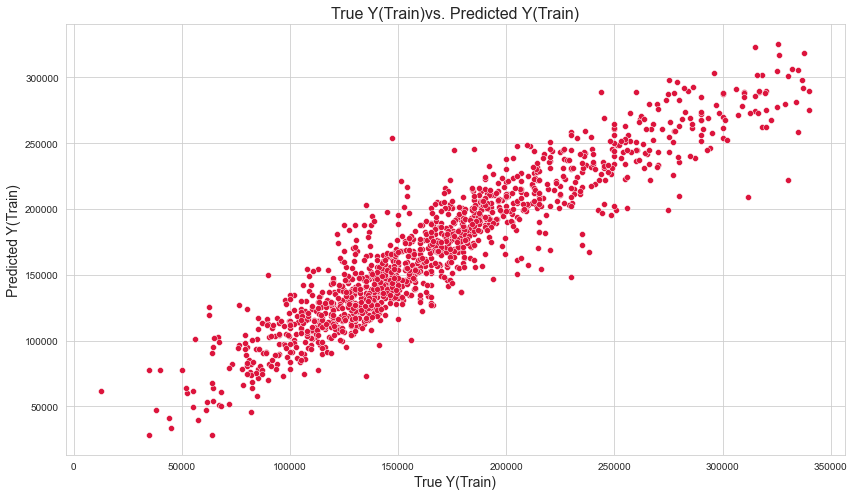

In [161]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg,x=y_train, y=train_preds, color='crimson');
plt.tight_layout()

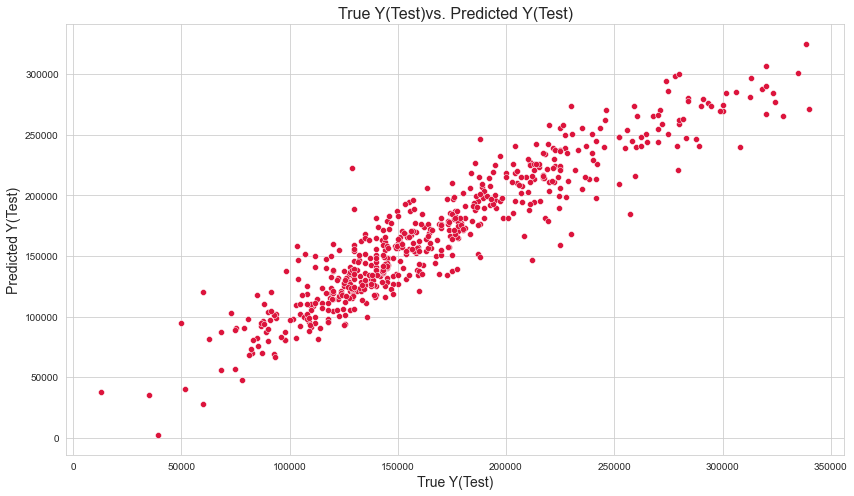

In [162]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data= linreg,x=y_test, y=test_preds, color='crimson');
plt.tight_layout()

In [168]:
ada = AdaBoostRegressor()

In [169]:
cross_val_score(ada,X_train,y_train).mean(), cross_val_score(ada,X_test,y_test).mean()

(0.8296561599711044, 0.8134708503688259)

In [170]:
ada.fit(X_train,y_train)

AdaBoostRegressor()

In [171]:
ada.score(X_train,y_train), ada.score(X_test,y_test)

(0.86554654048242, 0.8416626864356094)

In [173]:
set(zip(X.columns, ada.feature_importances_))

{('1st_flr_sf', 0.0179686132193323),
 ('best_gr_live_area', 0.0),
 ('both_exterior_VynilSd', 0.016241825934651077),
 ('bsmtfin_sf_1', 0.05481154061295221),
 ('central_air', 0.004784051337120355),
 ('foundation_PConc', 0.023039664525939224),
 ('full_bath', 0.0008132477777773995),
 ('garage_cars', 0.004087312638906396),
 ('garage_yr_blt_imp', 0.004747210945297086),
 ('gr_liv_area', 0.04801048863910595),
 ('has_fireplaces', 0.0114733612630276),
 ('heating_qc_oe', 0.0008110741801693963),
 ('heatqc_is_ex', 0.008891394072622075),
 ('high_qual', 0.05253796267819209),
 ('mas_vnr_area', 0.02390470489171162),
 ('massive_sf', 0.0),
 ('ms_subclass_60', 0.005840743051906258),
 ('neighborhood_NridgHt', 0.012785516143667337),
 ('open_porch_sf', 0.03166521280089997),
 ('overall_qual', 0.1796999441166711),
 ('paved_drive', 0.0040939640390647595),
 ('recent_remodel', 0.0),
 ('total_bsmt_sf', 0.0528100411687557),
 ('total_sf', 0.30210425881364805),
 ('totrms_abvgrd', 0.0019848807194439632),
 ('year_built

### Optimize the workflow for linear regressions

In [182]:
def corr_col_names(data, col, corr_num):
    corr_df = data.corr()[[col]] > (corr_num)
    corr_col_list = corr_df[corr_df[col]==True].index
    corr_col_list = [col for col in corr_col_list]
    new_train_data = pd.DataFrame(data, columns=corr_col_list)
    return new_train_data

In [230]:
def X_y_features(data):
    features = [col for col in data.columns if col != 'saleprice']
    X = data[features]
    y = data['saleprice']
    return X, y, features

def train_test(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= .7, random_state=42)
    return X_train, X_test, y_train, y_test

def instantiate_lr():
    linreg = LinearRegression()
    return linreg

def cross_val_scores(linreg, X_train,y_train, X_test, y_test):
    print(f'Cross val score for training set:{cross_val_score(linreg, X_train, y_train).mean()}')
    print(f'Cross val score for testing set:{cross_val_score(linreg, X_test, y_test).mean()}')


def fit_linreg(linreg, X_train,y_train, X_test, y_test):
    linreg.fit(X_train,y_train)
    print(f'Training score is:{linreg.score(X_train, y_train)}.')
    print(f'Testing score is:{linreg.score(X_test, y_test)}.')
    return linreg

def linreg_coefunct(linreg, X):    
    linreg_coef_dict = set(zip(X.columns,linreg.coef_))
    linreg_coef_df = pd.DataFrame(linreg_coef_dict, 
             columns=['feature', 'coefficient']).sort_values(by='coefficient', ascending=False)
    top_ten_coeff = linreg_coef_df[:11]
    top_ten_coeff.set_index(keys='feature',inplace = True)
    return linreg_coef_df, top_ten_coeff

def lin_reg_predict(linreg, X_train, X_test):
    train_preds = linreg.predict(X_train)
    test_preds = linreg.predict(X_test)
    return train_preds, test_preds


In [231]:
new_train_25=corr_col_names(train,'saleprice',.25)
X_25,y_25,features_25 = X_y_features(new_train_25)
X_train_25, X_test_25, y_train_25, y_test_25 = train_test(X_25,y_25)
lr_25 = instantiate_lr()
cross_val_scores(lr_25, X_train_25, y_train_25, X_test_25, y_test_25)
lr_25 = fit_linreg(lr_25, X_train_25, y_train_25, X_test_25, y_test_25)
lr_25_coef, lr_25_coef_topten = linreg_coefunct(lr_25, X_25)
train_preds_25, test_preds_25 = lin_reg_predict(lr_25, X_train_25,X_test_25)

Cross val score for training set:0.8695219379585494
Cross val score for testing set:0.871378465761131
Training score is:0.8794099989823032.
Testing score is:0.8809990907170373.


In [221]:
run_metrics(y_train_25, train_preds_25, y_test_25, test_preds_25)

The training MSE is 408688775.05771285, while the testing MSE is 397568963.9510005
The training RMSE is 20216.05241034245, while the testing RMSE is 19939.13147433961
R2 train score: 0.88, while R2 test score: 0.88
Adj R2: 0.92


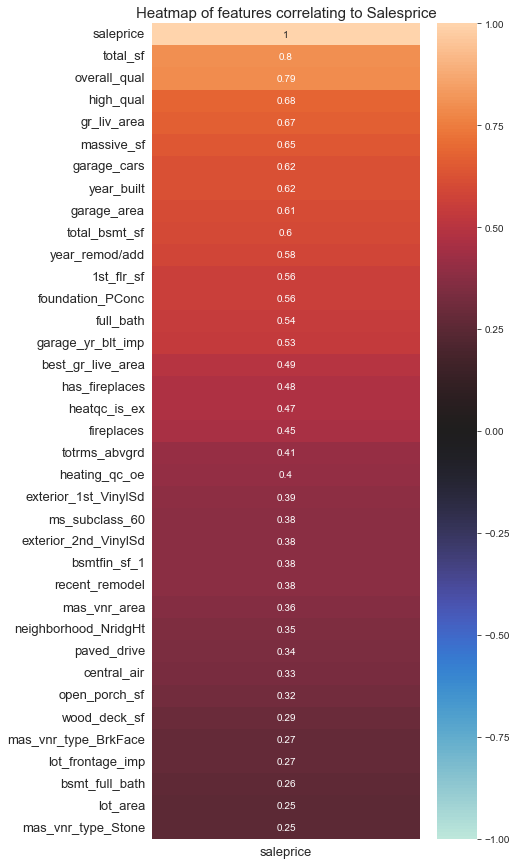

In [219]:
plt.figure(figsize=(6,15))
plt.title('Heatmap of features correlating to Salesprice', fontsize = 15)
plt.yticks(fontsize=13)
plt.xticks(fontsize =13)
sns.heatmap(corr_to_target(new_train_25,'saleprice'),
            cmap='icefire',annot = True, vmin = -1, vmax = 1);

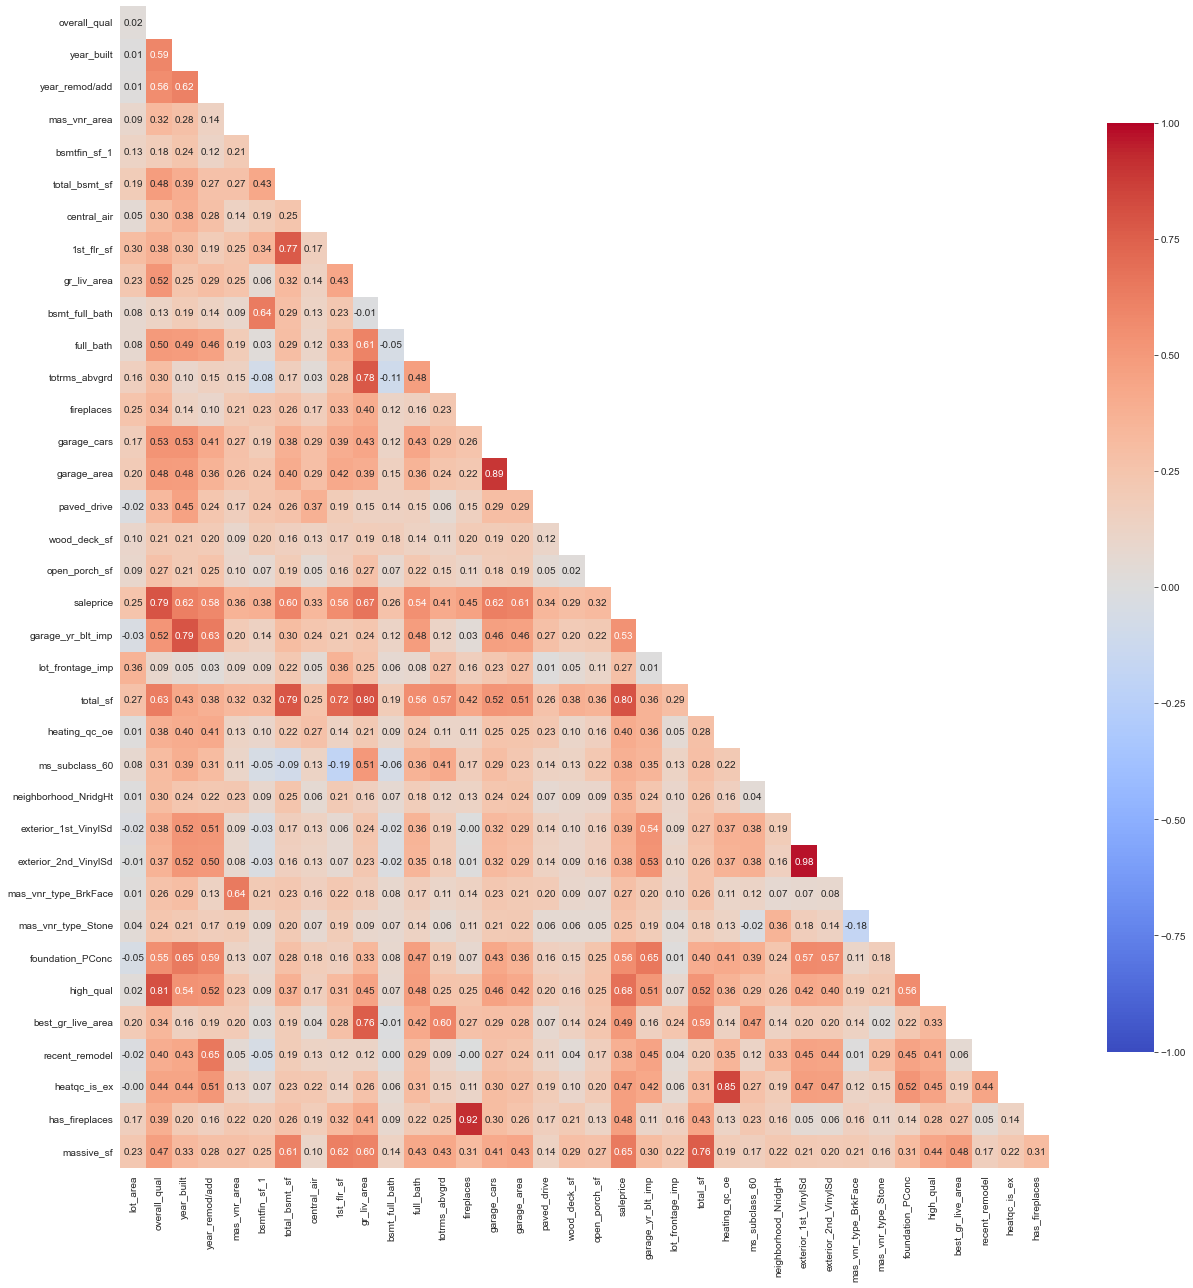

In [220]:
new_train_25_corr = new_train_25.corr()
mask_25 = np.triu(np.ones_like(new_train_25_corr, dtype='bool'))
# adjust mask and df
mask_25 = mask_25[1:, :-1]
corr_25 = new_train_25_corr.iloc[1:,:-1].copy()
# plot heatmap
plt.figure(figsize = (18,18))
sns.heatmap(corr_25, mask=mask_25, annot=True, fmt=".2f", cmap='coolwarm',
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})
# yticks
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

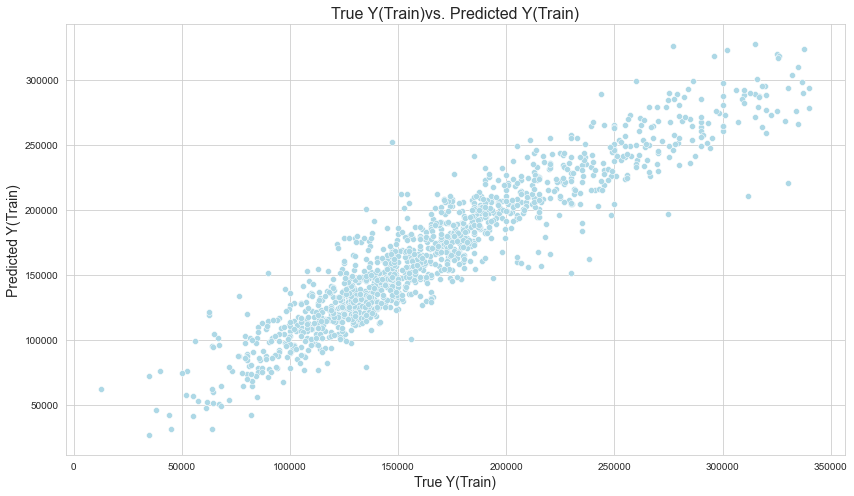

In [223]:
plt.figure(figsize = (12,7))
plt.title('True Y(Train)vs. Predicted Y(Train)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Train)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Train)', fontdict={'fontsize': 14})
sns.scatterplot(data= lr_25,x=y_train_25, y=train_preds_25, color='lightblue');
plt.tight_layout()

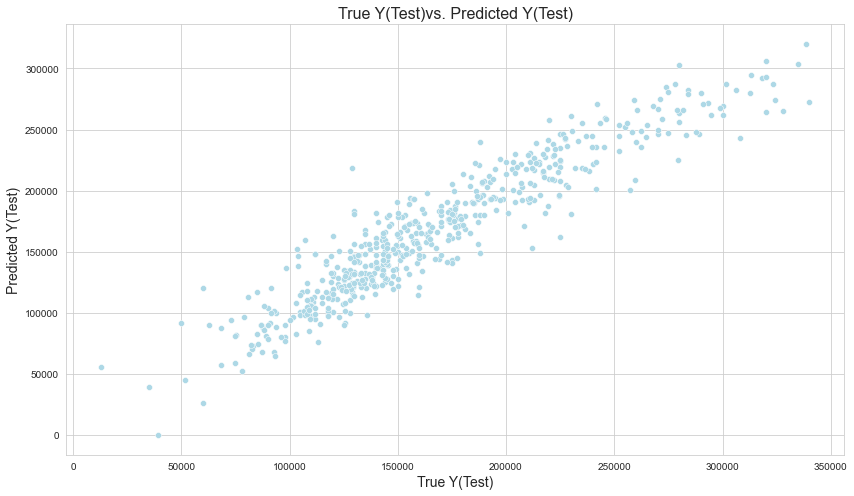

In [225]:
plt.figure(figsize = (12,7))
plt.title('True Y(Test)vs. Predicted Y(Test)',fontdict={'fontsize': 16})
plt.xlabel('True Y(Test)', fontdict={'fontsize': 14})
plt.ylabel('Predicted Y(Test)', fontdict={'fontsize': 14})
sns.scatterplot(data= lr_25,x=y_test_25, y=test_preds_25, color='lightblue');
plt.tight_layout()

In [233]:
lr_25_coef_topten

coefficient
feature                           
neighborhood_NridgHt  17993.042652
exterior_2nd_VinylSd  12866.797108
overall_qual          12694.415137
massive_sf            11447.378307
heatqc_is_ex           9538.739488
ms_subclass_60         6748.541374
fireplaces             6390.292904
foundation_PConc       5358.924486
central_air            5339.997267
high_qual              5130.355526
bsmt_full_bath         3575.050495

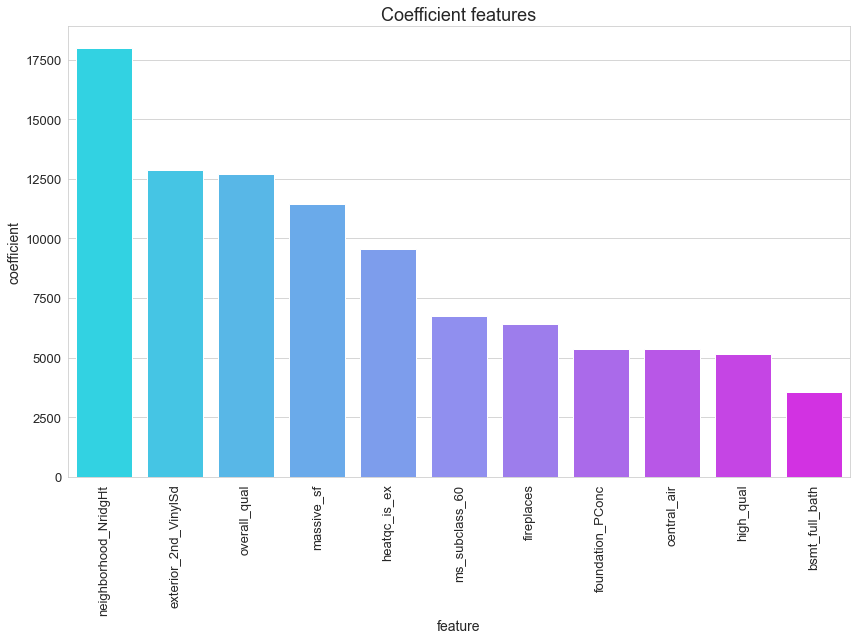

In [232]:
plt.figure(figsize =(12,9))
plt.title('Coefficient features', fontsize = 18)
plt.xlabel('Columns/Features', fontsize = 14)
plt.ylabel('Coefficient', fontsize = 14)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks(fontsize = 13)
sns.barplot(data = lr_25_coef_topten, x = lr_25_coef_topten.index, y = 'coefficient', palette='cool')
plt.tight_layout();


In [235]:
new_train_20=corr_col_names(train,'saleprice',.20)
X_20,y_20,features_20 = X_y_features(new_train_20)
X_train_20, X_test_20, y_train_20, y_test_20 = train_test(X_20,y_20)
lr_20 = instantiate_lr()
cross_val_scores(lr_20, X_train_20, y_train_20, X_test_20, y_test_20)
lr_20 = fit_linreg(lr_20, X_train_20, y_train_20, X_test_20, y_test_20)
lr_20_coef, lr_20_coef_topten = linreg_coefunct(lr_20, X_20)
train_preds_20, test_preds_20 = lin_reg_predict(lr_20, X_train_20,X_test_20)

Cross val score for training set:0.8738018539035888
Cross val score for testing set:0.8730375511708413
Training score is:0.8862580476337094.
Testing score is:0.881522229031799.


In [236]:
run_metrics(y_train_20, train_preds_20, y_test_20, test_preds_20)

The training MSE is 385480212.23111373, while the testing MSE is 395821216.3156579
The training RMSE is 19633.649997672714, while the testing RMSE is 19895.256125912478
R2 train score: 0.89, while R2 test score: 0.88
Adj R2: 0.92


In [237]:
new_train_15=corr_col_names(train,'saleprice',.15)
X_15,y_15,features_15 = X_y_features(new_train_15)
X_train_15, X_test_15, y_train_15, y_test_15 = train_test(X_15,y_15)
lr_15 = instantiate_lr()
cross_val_scores(lr_15, X_train_15, y_train_15, X_test_15, y_test_15)
lr_15 = fit_linreg(lr_15, X_train_15, y_train_15, X_test_15, y_test_15)
lr_15_coef, lr_15_coef_topten = linreg_coefunct(lr_15, X_15)
train_preds_15, test_preds_15 = lin_reg_predict(lr_15, X_train_15,X_test_15)

Cross val score for training set:0.8751006167732873
Cross val score for testing set:0.8820493585948421
Training score is:0.889109620324739.
Testing score is:0.8896938976192078.


In [238]:
run_metrics(y_train_15, train_preds_15, y_test_15, test_preds_15)

The training MSE is 375816013.373417, while the testing MSE is 368520569.3405835
The training RMSE is 19385.974656266757, while the testing RMSE is 19196.889574631186
R2 train score: 0.89, while R2 test score: 0.89
Adj R2: 0.92


In [239]:
new_train_10=corr_col_names(train,'saleprice',.10)
X_10,y_10,features_10 = X_y_features(new_train_10)
X_train_10, X_test_10, y_train_10, y_test_10 = train_test(X_10,y_10)
lr_10 = instantiate_lr()
cross_val_scores(lr_10, X_train_10, y_train_10, X_test_10, y_test_10)
lr_10 = fit_linreg(lr_10, X_train_10, y_train_10, X_test_10, y_test_10)
lr_10_coef, lr_10_coef_topten = linreg_coefunct(lr_10, X_10)
train_preds_10, test_preds_10 = lin_reg_predict(lr_10, X_train_10,X_test_10)

Cross val score for training set:0.8813555795638701
Cross val score for testing set:0.8832731025758666
Training score is:0.8970117035200044.
Testing score is:0.8990994472202851.


In [240]:
run_metrics(y_train_10, train_preds_10, y_test_10, test_preds_10)

The training MSE is 349035246.52523345, while the testing MSE is 337097661.4584381
The training RMSE is 18682.4850200725, while the testing RMSE is 18360.219537315945
R2 train score: 0.9, while R2 test score: 0.9
Adj R2: 0.92


In [242]:
new_train_05=corr_col_names(train,'saleprice',.05)
X_05,y_05,features_05 = X_y_features(new_train_05)
X_train_05, X_test_05, y_train_05, y_test_05 = train_test(X_05,y_05)
lr_05 = instantiate_lr()
cross_val_scores(lr_05, X_train_05, y_train_05, X_test_05, y_test_05)
lr_05 = fit_linreg(lr_05, X_train_05, y_train_05, X_test_05, y_test_05)
lr_05_coef, lr_05_coef_topten = linreg_coefunct(lr_05, X_05)
train_preds_05, test_preds_05 = lin_reg_predict(lr_05, X_train_05,X_test_05)
run_metrics(y_train_05, train_preds_05, y_test_05, test_preds_05)

Cross val score for training set:0.8883966813277624
Cross val score for testing set:0.8812125426202551
Training score is:0.9049906552014937.
Testing score is:0.89869308678888.
The training MSE is 321993966.47354805, while the testing MSE is 338455267.0152178
The training RMSE is 17944.190326496988, while the testing RMSE is 18397.15377484294
R2 train score: 0.9, while R2 test score: 0.9
Adj R2: 0.92
